## Scatter plots and jittering
There are three different way to use jitter

In [2]:
library(ggplot2)
# setting the graphic width and height for ggplot
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

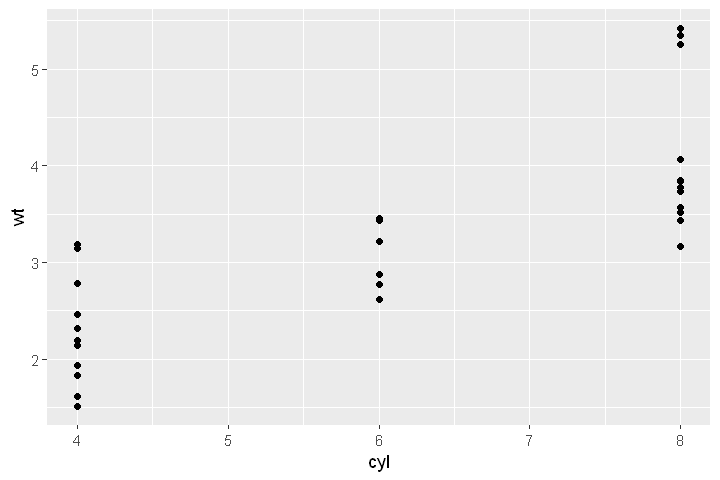

In [3]:
ggplot(mtcars, aes(x = cyl, y = wt)) +
  geom_point()

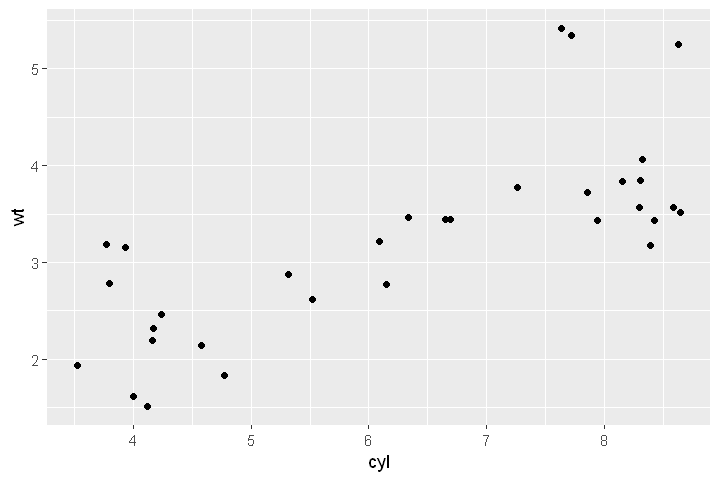

In [4]:
# 1 - With geom_jitter()
ggplot(mtcars, aes(x = cyl, y = wt)) +
  geom_jitter()

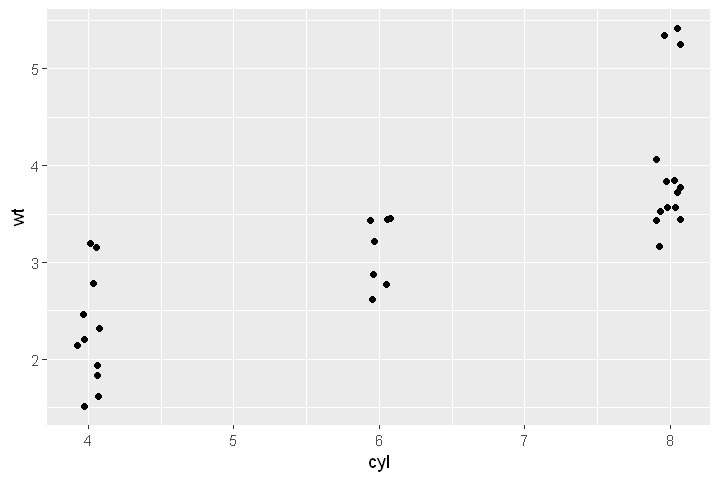

In [5]:
# 2 - Set width in geom_jitter()
ggplot(mtcars, aes(x = cyl, y = wt)) +
  geom_jitter(width = 0.1)

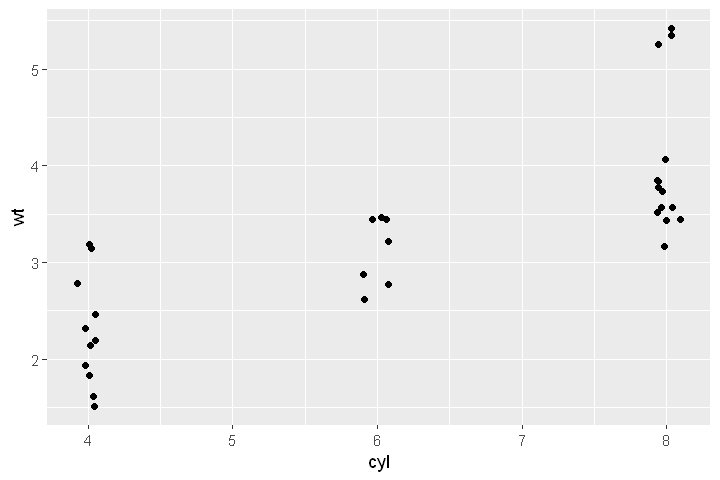

In [6]:
# 3 - Set position = position_jitter() in geom_point() ()
ggplot(mtcars, aes(x = cyl, y = wt)) +
  geom_point(position = position_jitter(0.1))

## Histogram
*The x axis/aesthetic:* The documentation for geom_histogram() states the argument stat = "bin" as a default. The histograms cut up a continuous variable into discrete bins - that's what the stat "bin" is doing. You always get 30 evenly-sized bins by default, which is specified with the default argument binwidth = range/30. 
<br> *The y axis/aesthetic:* geom_histogram() only requires one aesthetic: x. The variable mapped to the y aesthetic, is called ..count... When geom_histogram() executed the binning statistic, it not only cut up the data into discrete bins, but it also counted how many values are in each bin. So there is an internal data frame where this information is stored. The .. calls the variable count from this internal data frame. In this internal data frame is also the density calculated. This is the proportional frequency of the bin in relation to the whole data set. You use ..density.. to access this information.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


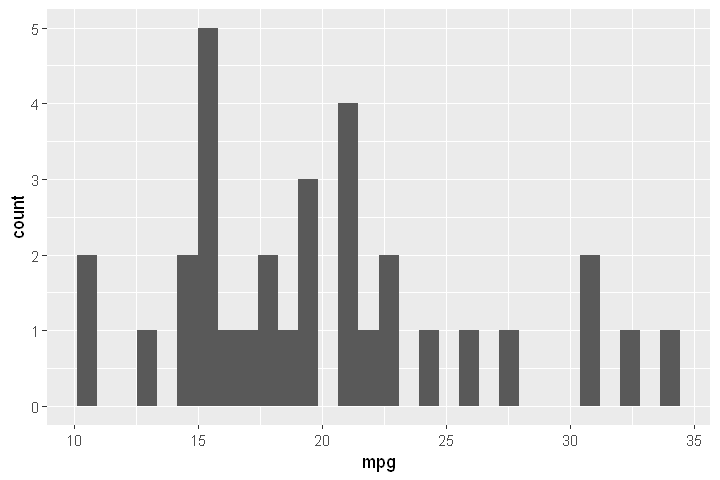

In [7]:
# Make a univariate histogram
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram()

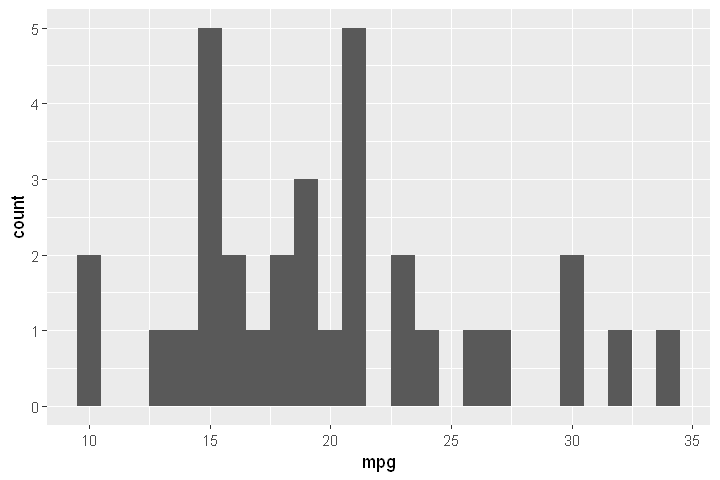

In [8]:
# Plot 1, plus set binwidth to 1 in the geom layer
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(binwidth = 1)

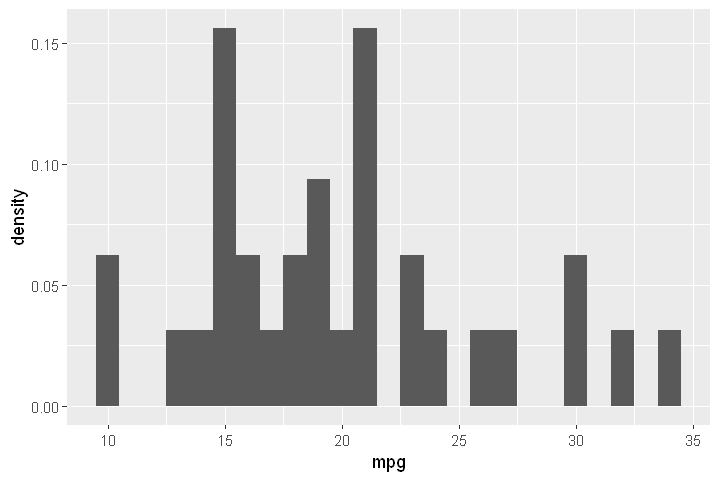

In [9]:
# 3 - Plot 2, plus MAP ..density.. to the y aesthetic (i.e. in a second aes() function)
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(aes(y = ..density..), binwidth = 1)

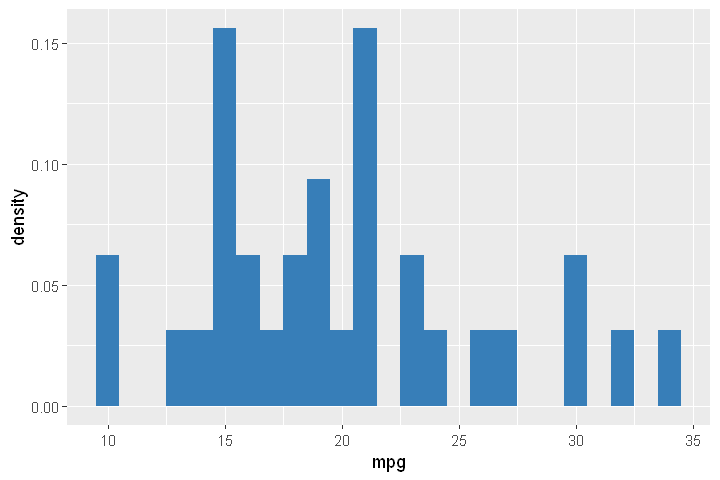

In [10]:
# 4 - plot 3, plus SET the fill attribute to "#377EB8"
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(aes(y = ..density..), fill = "#377EB8", binwidth = 1)

## geoms
Geoms also have a **position** argument, which you can use to specify how to draw the bars of the plot.

Three position arguments are:

    stack: place the bars on top of each other. Counts are used. This is the default position.
    fill: place the bars on top of each other, but this time use proportions.
    dodge: place the bars next to each other. Counts are used.

In [11]:
mtcars$am <- as.factor(mtcars$am)

In [12]:
mtcars$cyl <- as.factor(mtcars$cyl)

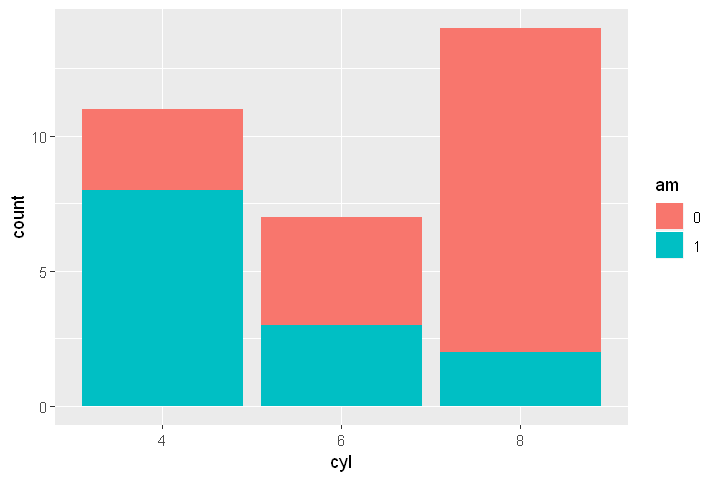

In [13]:
# Draw a bar plot of cyl, filled according to am
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar()

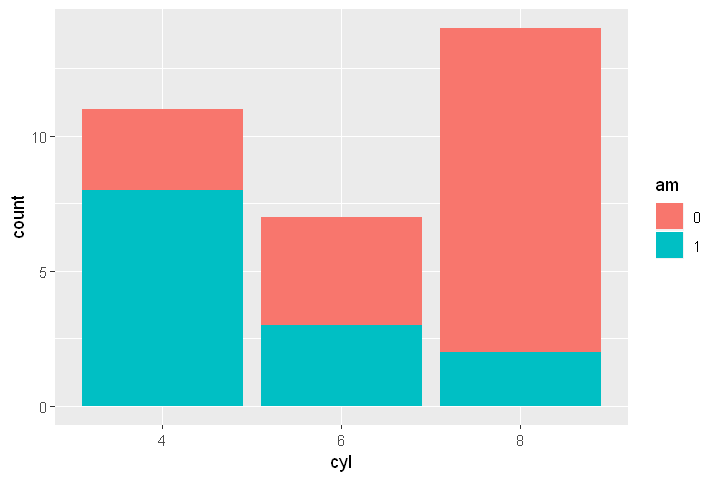

In [14]:
# Change the position argument to stack
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "stack")


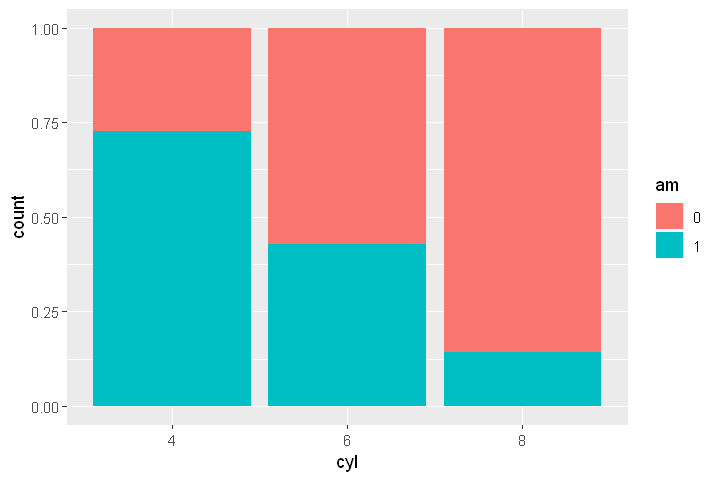

In [15]:
# Change the position argument to fill
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "fill")

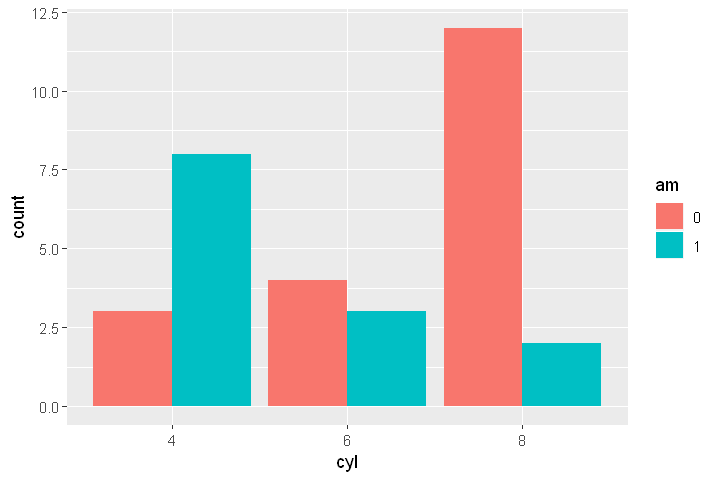

In [16]:
# Change the position argument to dodge
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "dodge")

## Overlapping bar plots
There are three different positions for bar plots: stack (the default), dodge (preferred), and fill (to show proportions).

You can also adjust the dodging, so that your bars partially overlap each other. 
Instead of using position = "dodge" we will use position_dodge().
The reason to use position_dodge() (and position_jitter()) is to specify how much dodging (or jittering) you want.

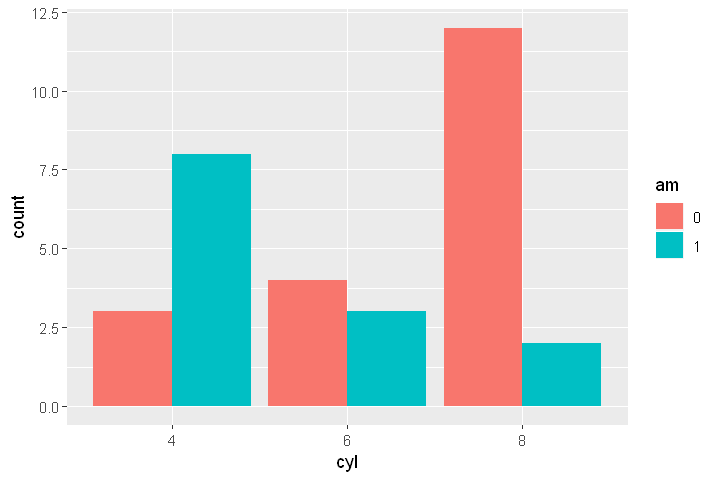

In [17]:
# 1 - The last plot form the previous exercise
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "dodge")

In [18]:
# 2 - Define posn_d with position_dodge()
posn_d <- position_dodge(width = 0.2)

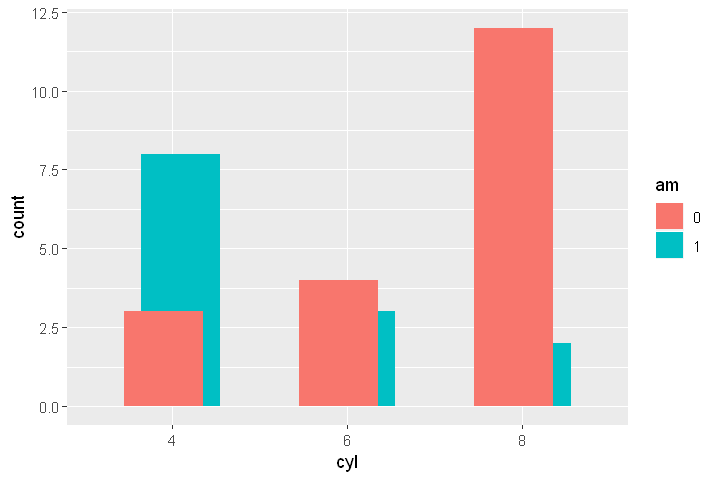

In [19]:
# 3 - Change the position argument to posn_d
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = posn_d)

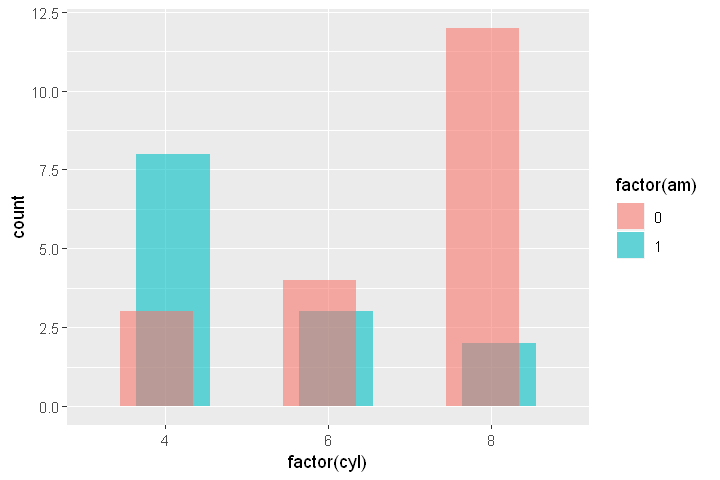

In [20]:
# 4 - Use posn_d as position and adjust alpha to 0.6
ggplot(mtcars, aes(x = factor(cyl), fill = factor(am))) +
  geom_bar(position = posn_d, alpha = 0.6)

## Overlapping histograms

Overlapping histograms pose similar problems to overlapping bar plots, but there is a unique solution here: a frequency polygon.

This is a geom specific to binned data that draws a line connecting the value of each bin. Like geom_histogram(), it takes a binwidth argument and by default stat = "bin" and position = "identity".

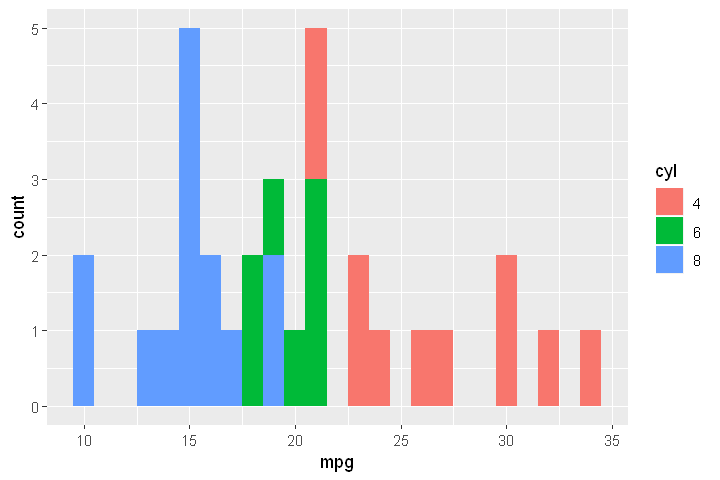

In [21]:
# A basic histogram, add coloring defined by cyl
ggplot(mtcars, aes(mpg, fill = cyl)) +
  geom_histogram(binwidth = 1)

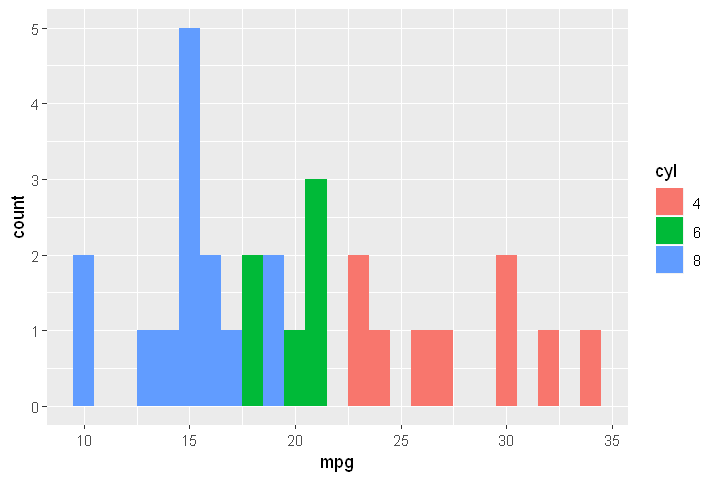

In [22]:
# Change position to identity
ggplot(mtcars, aes(mpg, fill = cyl)) +
  geom_histogram(position = "identity", binwidth = 1)

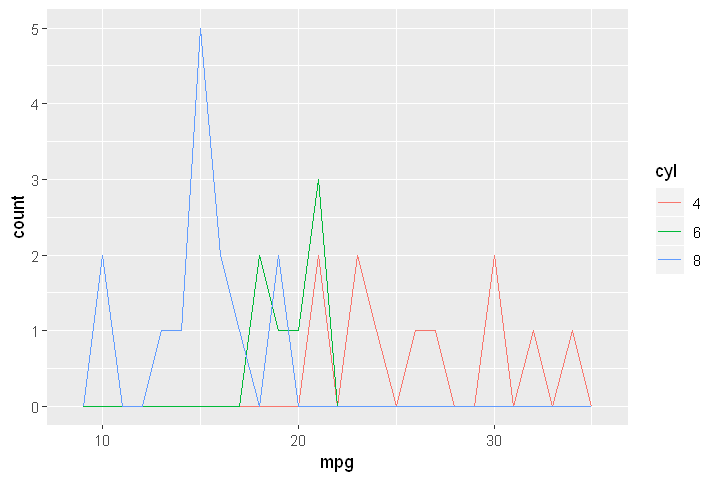

In [23]:
# Change geom to freqpoly (position is identity by default)
ggplot(mtcars, aes(mpg, color = cyl)) +
  geom_freqpoly(position = "identity", binwidth = 1)

## Bar plots with color ramp

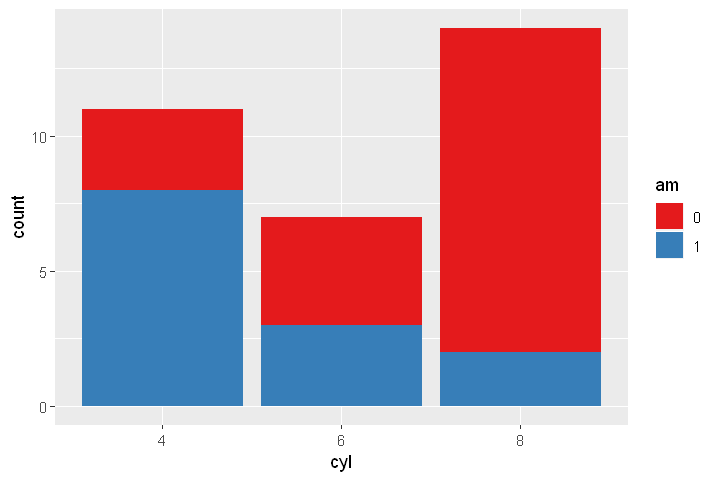

In [24]:
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar() +
  scale_fill_brewer(palette = "Set1")

## Overlapping histograms

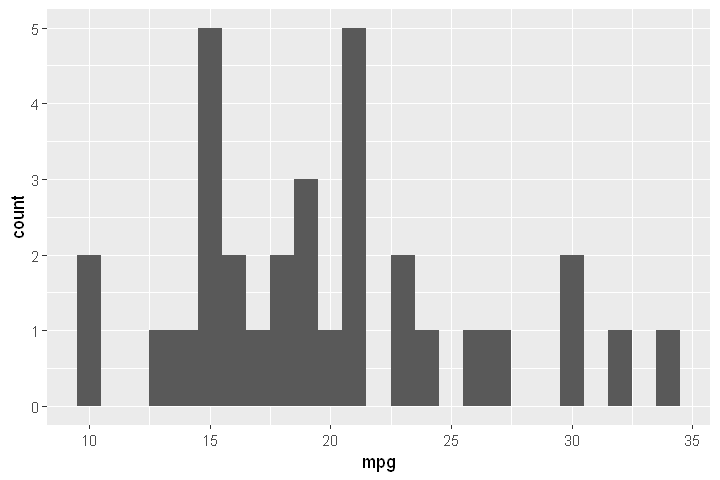

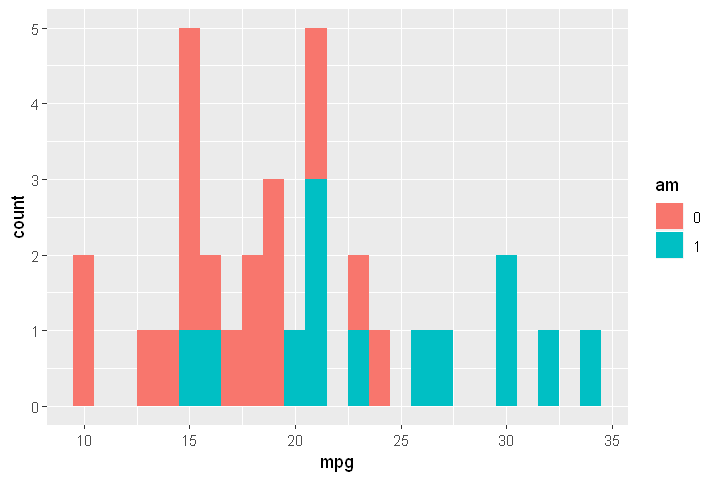

Warning message:
"Removed 16 rows containing missing values (geom_bar)."

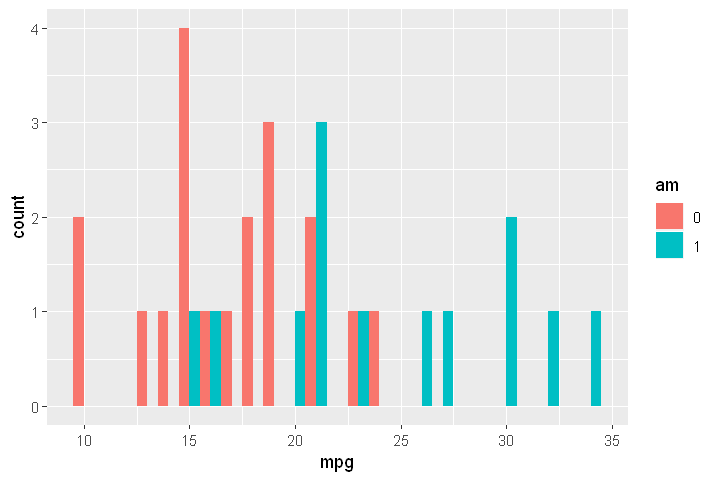

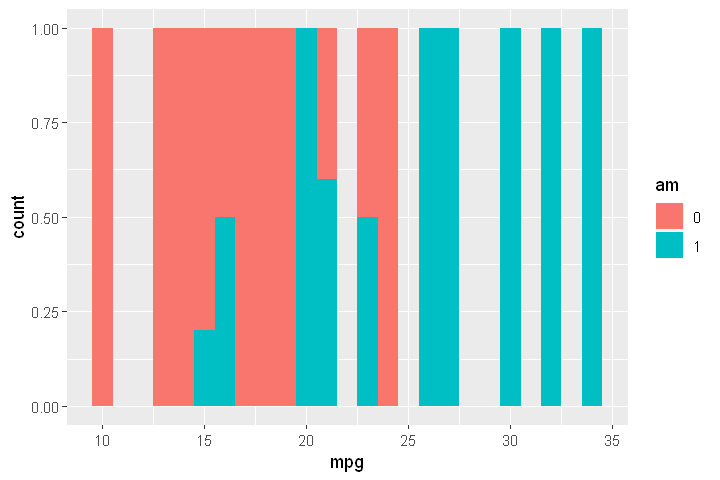

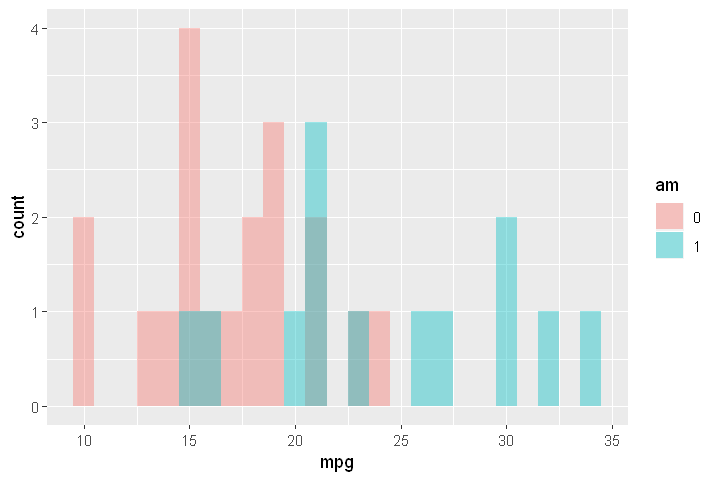

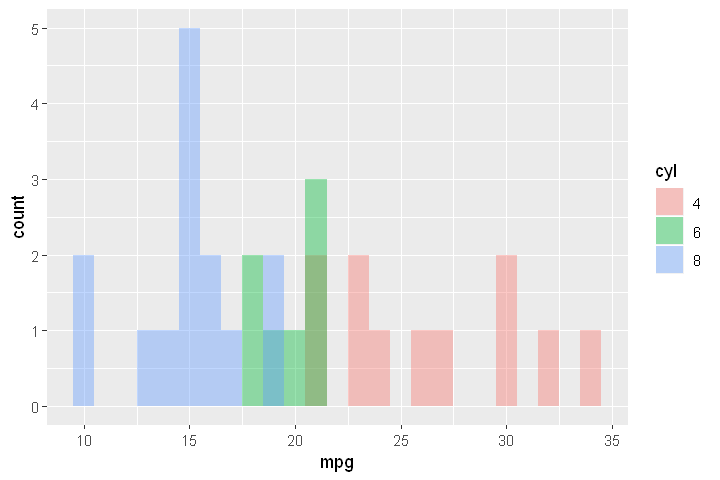

In [25]:
# 1 - Basic histogram plot command
ggplot(mtcars, aes(mpg)) +
  geom_histogram(binwidth = 1)

# 2 - Plot 1, Expand aesthetics: am onto fill
ggplot(mtcars, aes(mpg, fill = am)) +
  geom_histogram(binwidth = 1)



# 3 - Plot 2, change position = "dodge"
ggplot(mtcars, aes(mpg, fill = am)) +
  geom_histogram(binwidth = 1, position = "dodge")


# 4 - Plot 3, change position = "fill"
ggplot(mtcars, aes(mpg, fill = am)) +
  geom_histogram(binwidth = 1, position = "fill")


# 5 - Plot 4, plus change position = "identity" and alpha = 0.4
ggplot(mtcars, aes(mpg, fill = am)) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.4)



# 6 - Plot 5, plus change mapping: cyl onto fill
ggplot(mtcars, aes(mpg, fill = cyl)) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.4)


# Line plots

The economics data frame contains time series for unemployment and population statistics from the Federal Reserve Bank of St. Louis in the US. The data is contained in the ggplot2 package.

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945


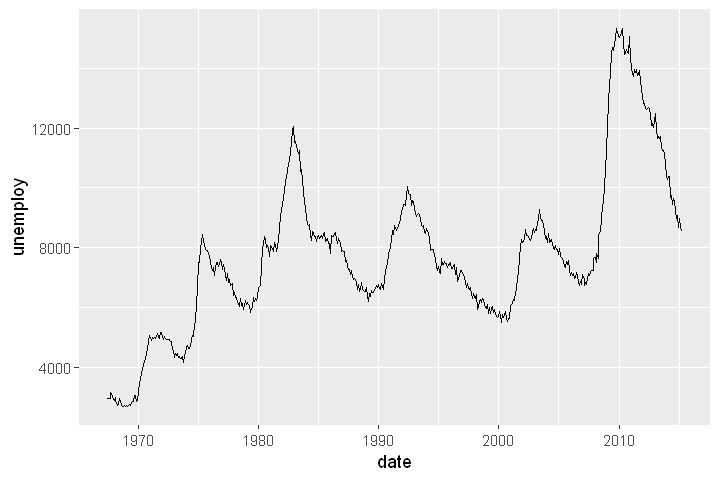

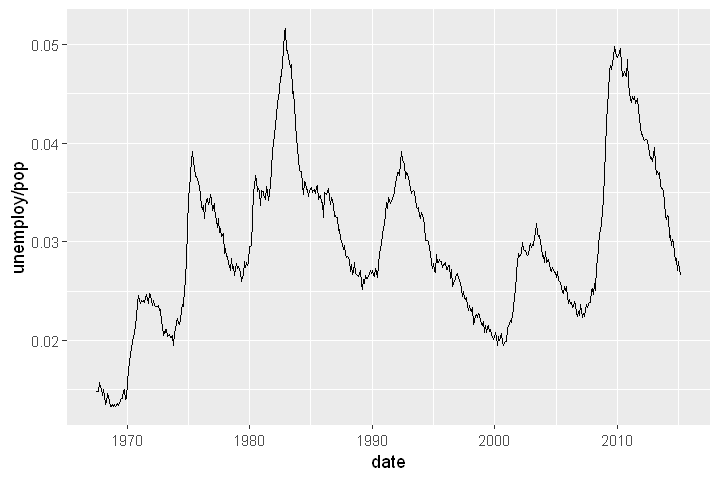

In [26]:
# Print out head of economics
head(economics, 2)

# Plot unemploy as a function of date using a line plot
ggplot(economics, aes(x = date, y = unemploy)) +
  geom_line()


# Adjust plot to represent the fraction of total population that is unemployed
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_line()

In [30]:
begin <- as.Date(c("1969-12-01", "1973-11-01", "1980-01-01", "1981-07-01", "1990-07-01", "2001-03-01"))
end <- as.Date(c("1970-11-01", "1975-03-01", "1980-07-01", "1982-11-01", "1991-03-01", "2001-11-01"))
recess <- data.frame(begin, end)
head(recess, 2)

begin,end
1969-12-01,1970-11-01
1973-11-01,1975-03-01


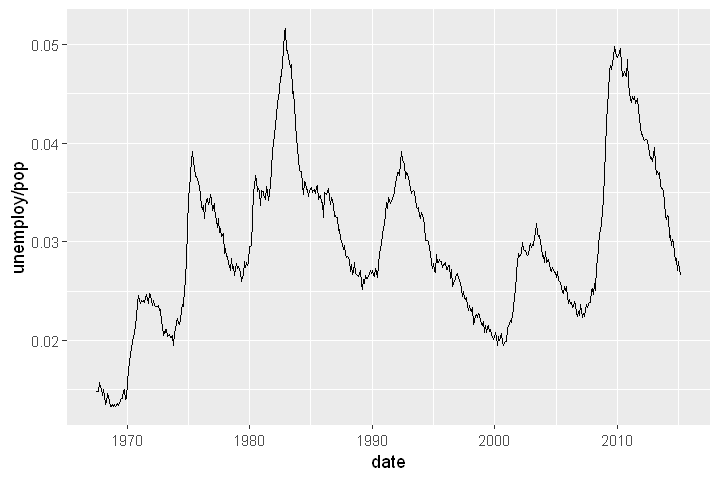

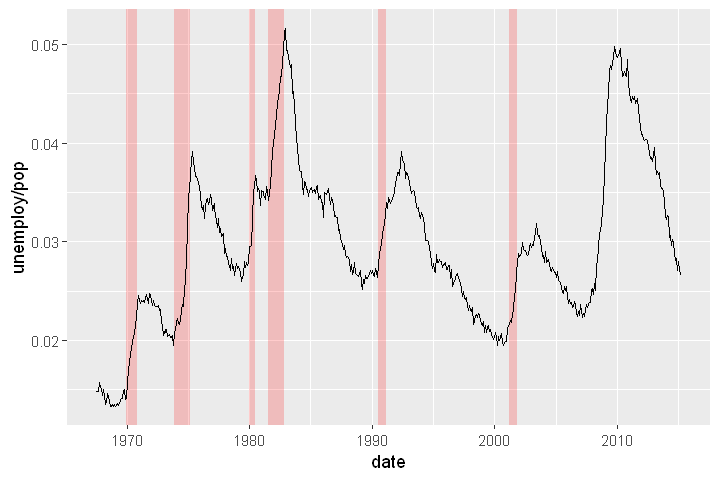

In [31]:
# Basic line plot
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_line()

# Expand the following command with geom_rect() to draw the recess periods
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_rect(data = recess,
         aes(xmin = begin, xmax = end , ymin = -Inf, ymax = +Inf),
         inherit.aes = FALSE, fill = "red", alpha = 0.2) +
  geom_line()

## gather 
gather() takes four arguments: the original data frame, the name of the key column, the name of the value column and the name of the grouping variable, with a minus in front. They can all be specified as object names (i.e. no "").

# base plot, ggplot and qplot

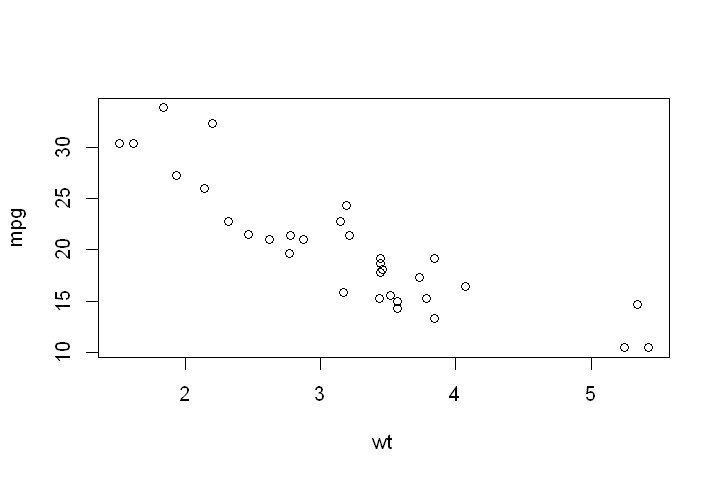

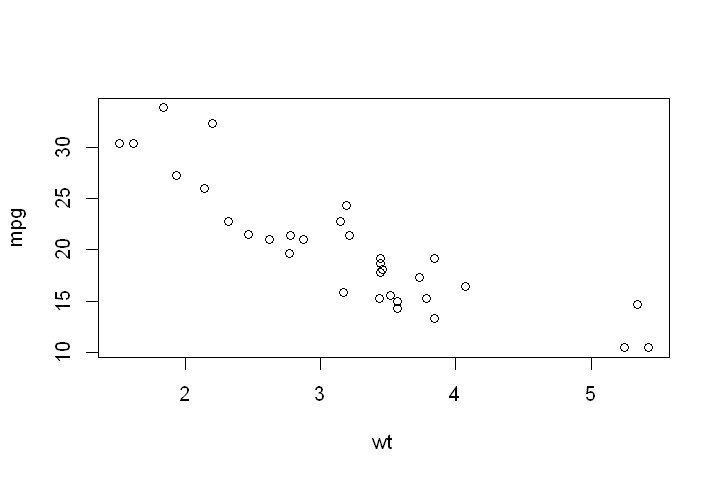

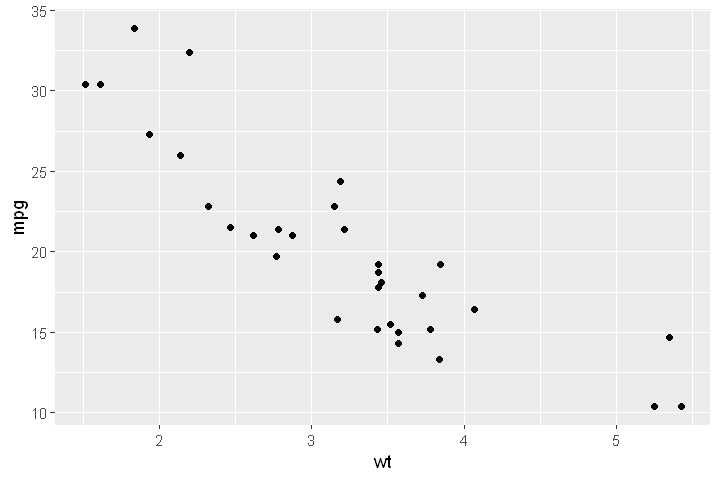

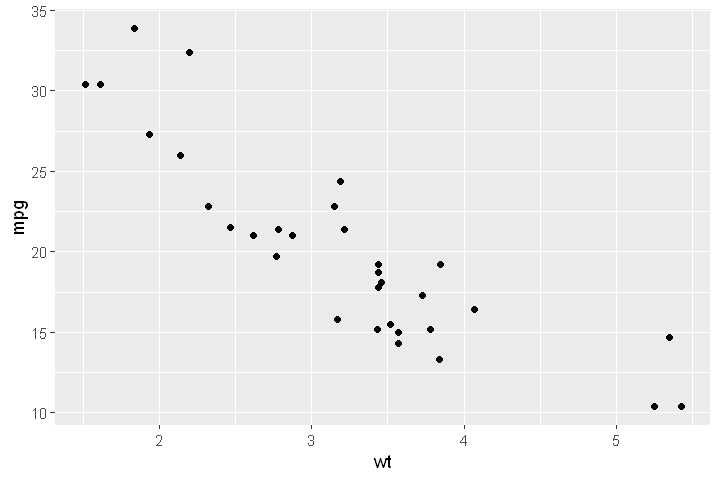

In [32]:
# The old way (shown)
plot(mpg ~ wt, data = mtcars) # formula notation
with(mtcars, plot(wt, mpg)) # x, y notation

# Using ggplot:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()

# Using qplot:
qplot(wt , mpg, data = mtcars)


## geom_dotplot
Scatter plots:
    Continuous x, continuous y.
<br>Dot plots:
    Categorical x, continuous y.
<br>The difference is that unlike geom_point(), geom_dotplot() uses a binning statistic. Binning means to cut up a continuous variable into discrete "bins". 

[1] "factor"

[1] "factor"

[1] "numeric"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


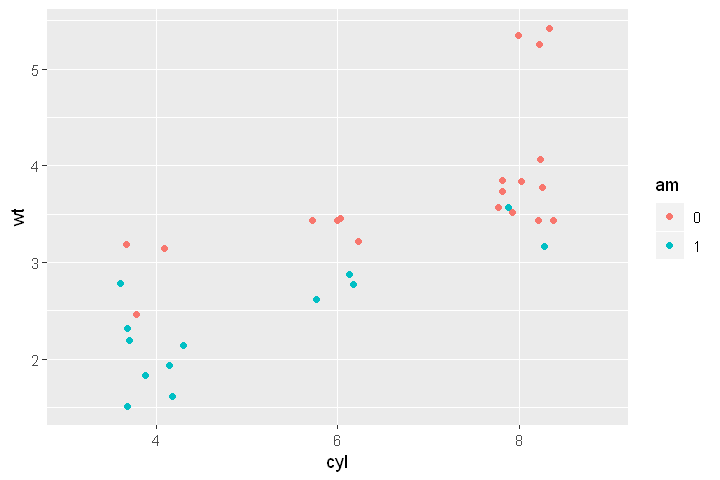

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


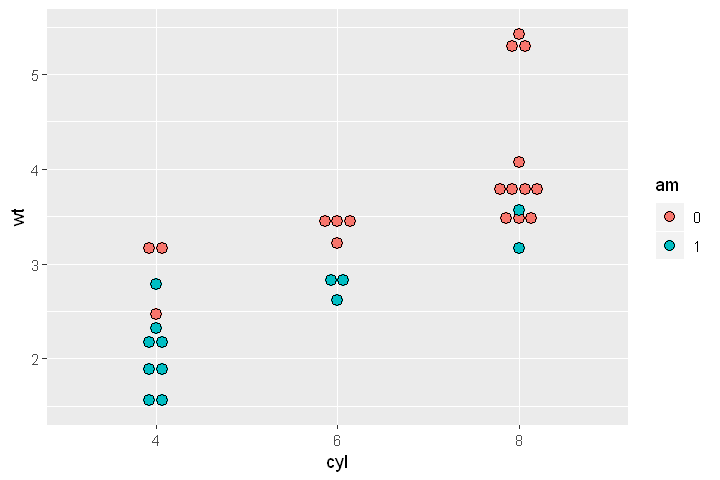

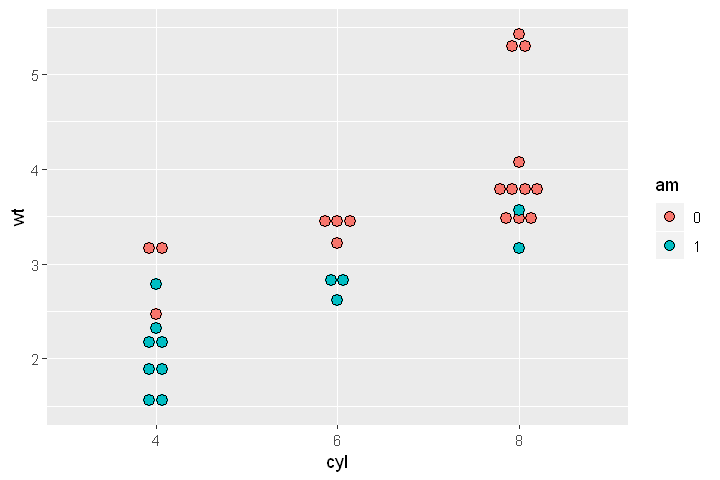

In [33]:
# cyl and am are factors, wt is numeric
class(mtcars$cyl)
class(mtcars$am)
class(mtcars$wt)

# "Basic" dot plot, with geom_point():
ggplot(mtcars, aes(cyl, wt, col = am)) +
  geom_point(position = position_jitter(0.2, 0))

# 1 - "True" dot plot, with geom_dotplot():
ggplot(mtcars, aes(cyl, wt, fill = am)) +
  geom_dotplot(binaxis = "y", stackdir = "center")

# 2 - qplot with geom "dotplot", binaxis = "y" and stackdir = "center"
qplot(
  cyl, wt,
  data = mtcars,
  fill = am,
  geom = "dotplot",
  binaxis = "y",
  stackdir = "center"
)

## Zooming in 

In [34]:
# Basic ggplot() command, coded for you
p <- ggplot(mtcars, aes(x = wt, y = hp, col = am)) + geom_point() + geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 12 rows containing non-finite values (stat_smooth)."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  3.168"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  4e-006"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 3.168"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.002"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1"

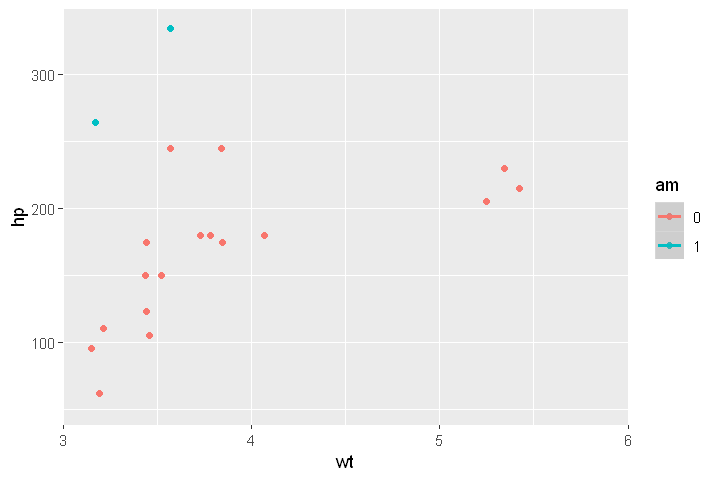

In [35]:
# Add scale_x_continuous()
p + scale_x_continuous(limits = c(3, 6), expand = c(0, 0))


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


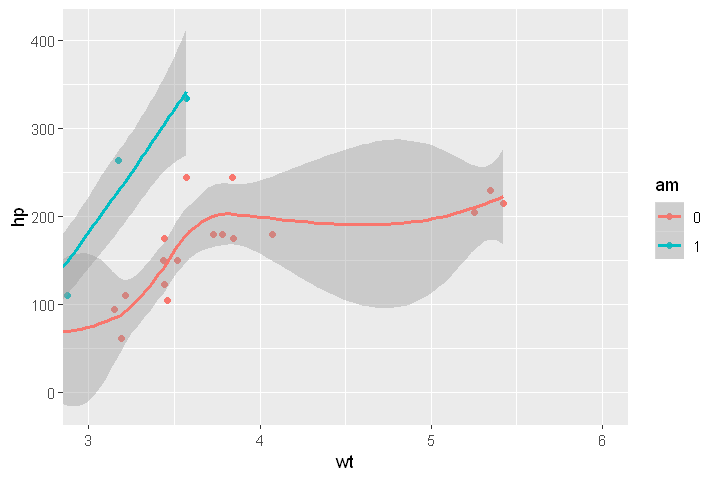

In [36]:
# Add coord_cartesian(): the proper way to zoom in
p + coord_cartesian(xlim = c(3,6))

### Aspect Ratio

We can set the aspect ratio of a plot with `coord_fixed()` or `coord_equal()`. Both use ratio = 1 as a default. A 1:1 aspect ratio is most appropriate when two continuous variables are on the same scale, as with the iris dataset.

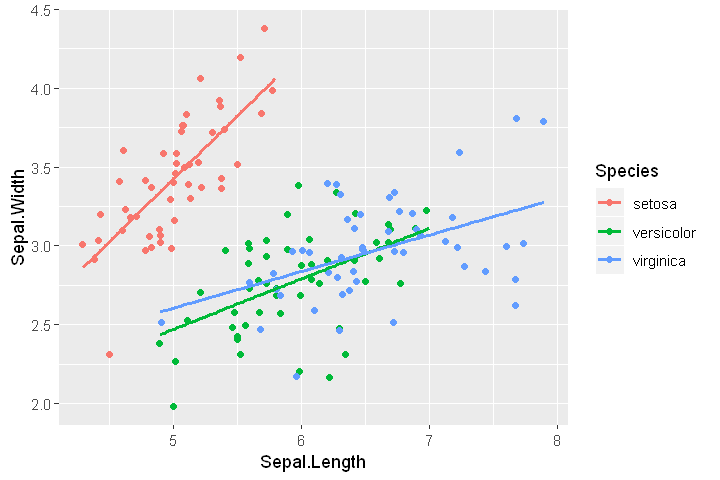

In [37]:
# Complete basic scatter plot function
base.plot <- ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, col = Species)) +
               geom_jitter() +
               geom_smooth(method = "lm", se = FALSE)

# Plot base.plot: default aspect ratio
base.plot

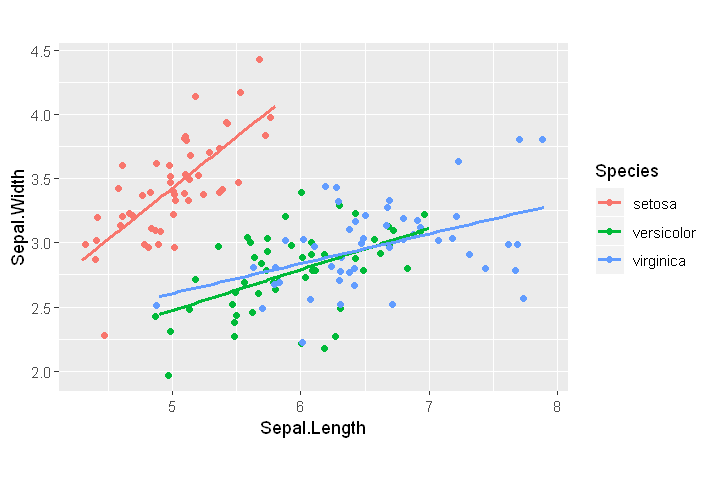

In [38]:
# Fix aspect ratio (1:1) of base.plot
base.plot + coord_equal(ratio = 1:1)

As a rule of thumb you'll want to use a 1:1 aspect ratio when your axes show the same scales, but there are always exceptions. 

## Pie charts

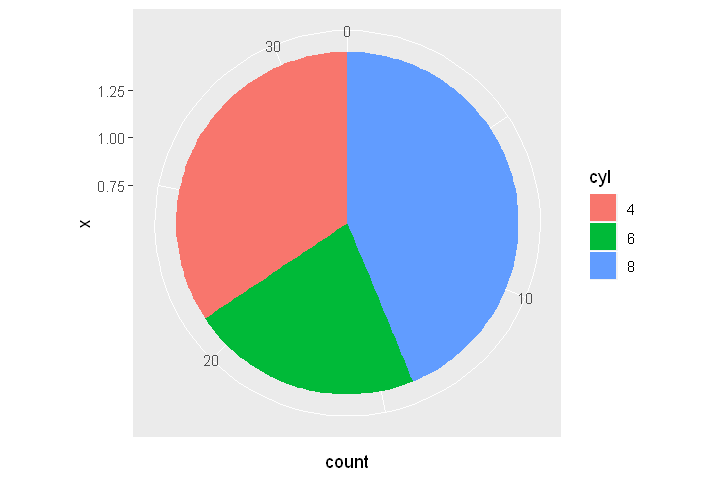

In [39]:
# Create a stacked bar plot: wide.bar
wide.bar <- ggplot(mtcars, aes(x = 1, fill = cyl)) +
              geom_bar()

# Convert wide.bar to pie chart
# This specifies the axis which would be transformed to polar coordinates.
wide.bar +
  coord_polar(theta = "y")

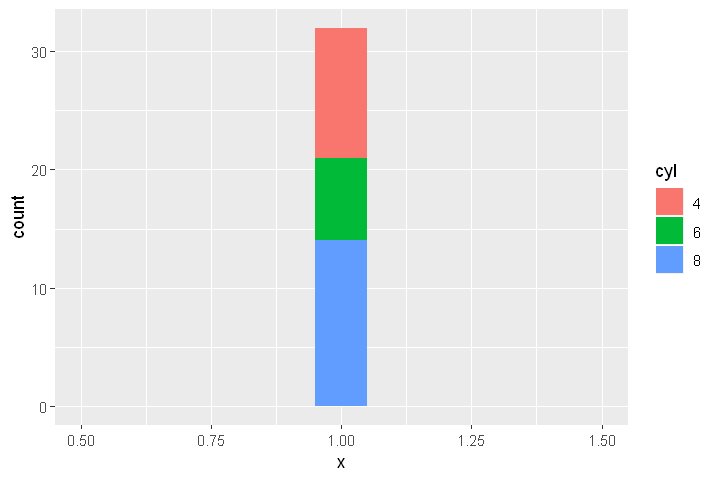

In [41]:
# Create stacked bar plot: thin.bar
#These two steps will add empty space around the bar on the x axis.
thin.bar <- ggplot(mtcars, aes(x = 1, fill = cyl)) +
              geom_bar(width = 0.1) +
              scale_x_continuous(limits = c(0.5, 1.5))
thin.bar

This function is particularly useful if you are dealing with a cycle, like yearly data, that you would like to see represented as such. 

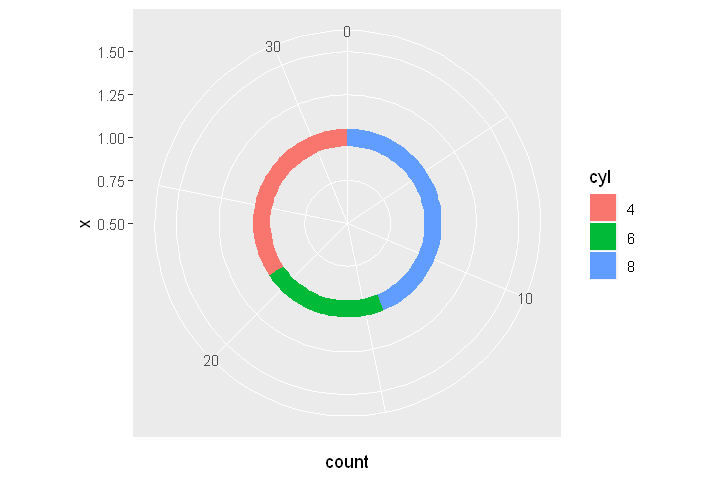

In [42]:
# Convert thin.bar to "ring" type pie chart
thin.bar + 
  coord_polar(theta = "y")

## Facets: the basics
The most straightforward way of using facets is `facet_grid()`. Here we just need to specify the categorical variable to use on rows and columns using standard R formula notation (rows ~ columns). For faceting ggplot will coerce variables to factor. When faceting in only one direction us `.` to specify nothing for the unused direction.

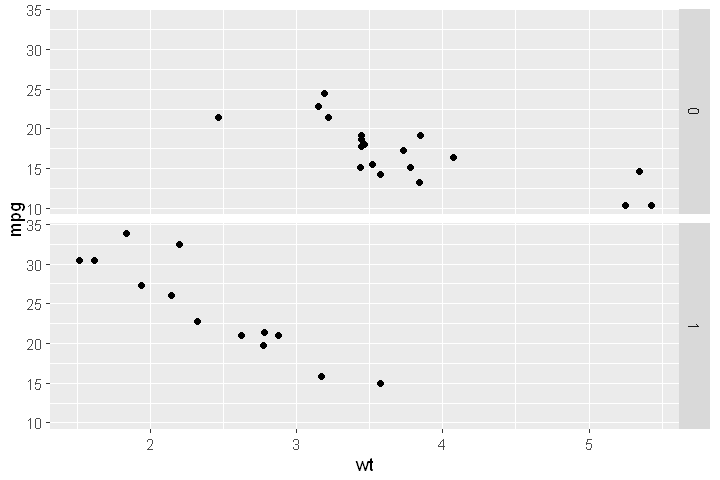

In [45]:
# Basic scatter plot
p <- ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()

# 1 - Separate rows according to transmission type, am
p +
  facet_grid(am ~ .)

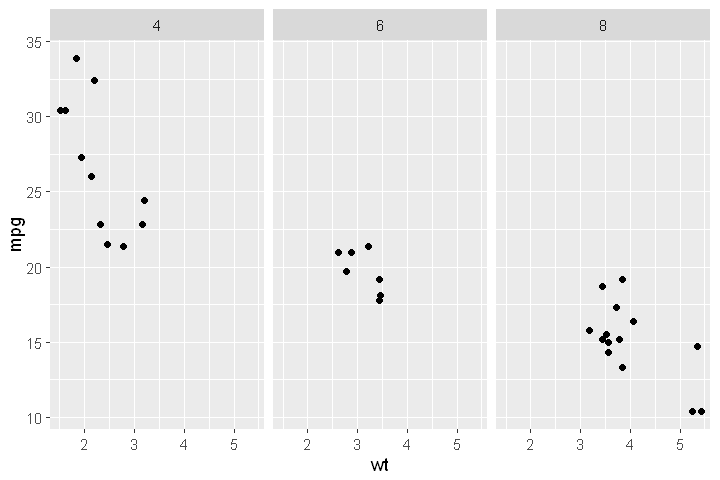

In [46]:
# 2 - Separate columns according to cylinders, cyl
p +
  facet_grid(. ~ cyl)


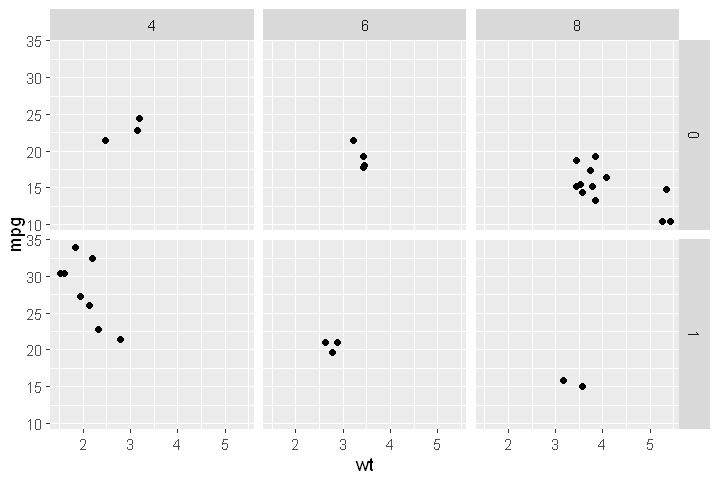

In [47]:
# 3 - Separate by both columns and rows 
p +
  facet_grid(am ~ cyl)

## Many variables
map two variables onto two color scales - hue and lightness. We combine cyl and am into a single variable cyl_am. To accommodate this we also make a new color palette with alternating red and blue of increasing darkness. This is saved as myCol. If you are not familiar with these steps, execute the code piece-by-piece.

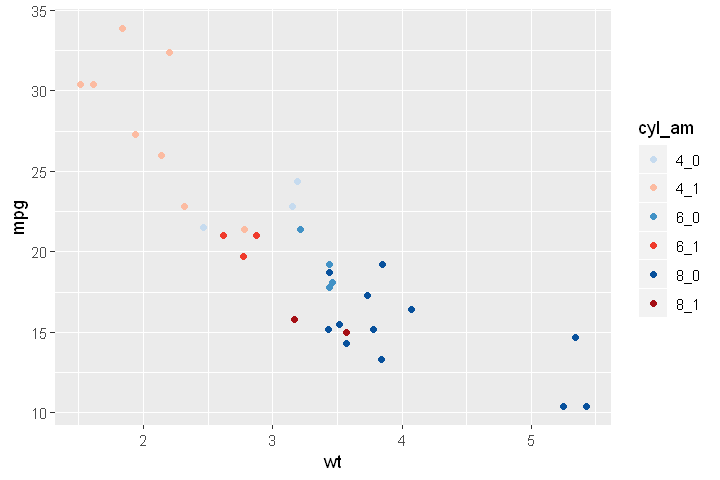

In [49]:
library(RColorBrewer)
# Code to create the cyl_am col and myCol vector
  mtcars$cyl_am <- paste(mtcars$cyl, mtcars$am, sep = "_")
  myCol <- rbind(brewer.pal(9, "Blues")[c(3,6,8)],
                 brewer.pal(9, "Reds")[c(3,6,8)])
  
  # Map cyl_am onto col
ggplot(mtcars, aes(x = wt, y = mpg, color = cyl_am)) +
    geom_point() +
    # Add a manual colour scale
    scale_color_manual(values = myCol)

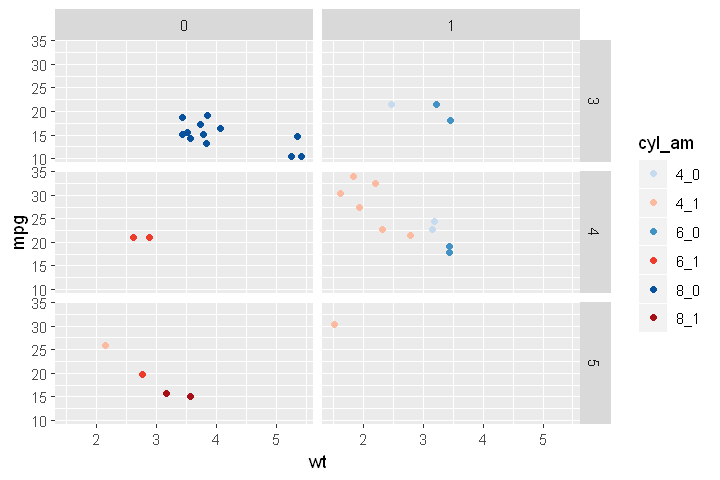

In [50]:
# Grid facet on gear vs. vs
ggplot(mtcars, aes(x = wt, y = mpg, color = cyl_am)) +
    geom_point() +
    # Add a manual colour scale
    scale_color_manual(values = myCol)+
    facet_grid(gear ~ vs)
  
  

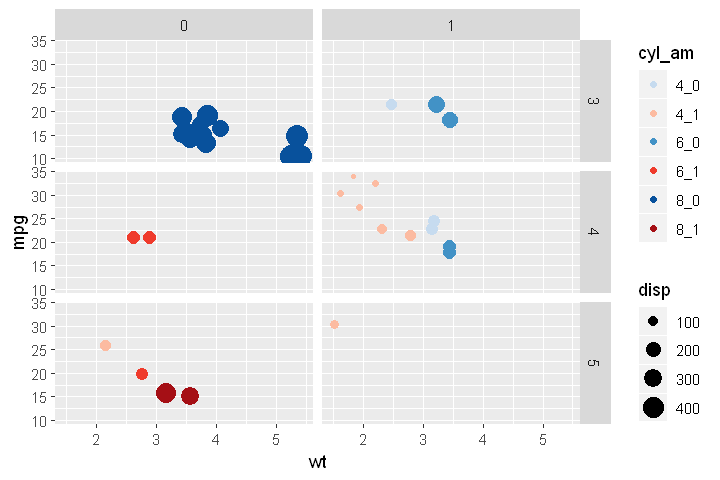

In [51]:
# Also map disp to size
  ggplot(mtcars, aes(x = wt, y = mpg, color = cyl_am, size = disp)) +
    geom_point() +
    # Add a manual colour scale
    scale_color_manual(values = myCol)+
    facet_grid(gear ~ vs)

## Droping levels
sometimes with facet you can get empty plots, therefore you may want to drop these cases

In [59]:
str(msleep)
summary(msleep)


Classes 'tbl_df', 'tbl' and 'data.frame':	83 obs. of  11 variables:
 $ name        : chr  "Cheetah" "Owl monkey" "Mountain beaver" "Greater short-tailed shrew" ...
 $ genus       : chr  "Acinonyx" "Aotus" "Aplodontia" "Blarina" ...
 $ vore        : chr  "carni" "omni" "herbi" "omni" ...
 $ order       : chr  "Carnivora" "Primates" "Rodentia" "Soricomorpha" ...
 $ conservation: chr  "lc" NA "nt" "lc" ...
 $ sleep_total : num  12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...
 $ sleep_rem   : num  NA 1.8 2.4 2.3 0.7 2.2 1.4 NA 2.9 NA ...
 $ sleep_cycle : num  NA NA NA 0.133 0.667 ...
 $ awake       : num  11.9 7 9.6 9.1 20 9.6 15.3 17 13.9 21 ...
 $ brainwt     : num  NA 0.0155 NA 0.00029 0.423 NA NA NA 0.07 0.0982 ...
 $ bodywt      : num  50 0.48 1.35 0.019 600 ...


     name              genus               vore              order          
 Length:83          Length:83          Length:83          Length:83         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 conservation        sleep_total      sleep_rem      sleep_cycle    
 Length:83          Min.   : 1.90   Min.   :0.100   Min.   :0.1167  
 Class :character   1st Qu.: 7.85   1st Qu.:0.900   1st Qu.:0.1833  
 Mode  :character   Median :10.10   Median :1.500   Median :0.3333  
                    Mean   :10.43   Mean   :1.875   Mean   :0.4396  
                    3rd Qu.:13.75   3rd

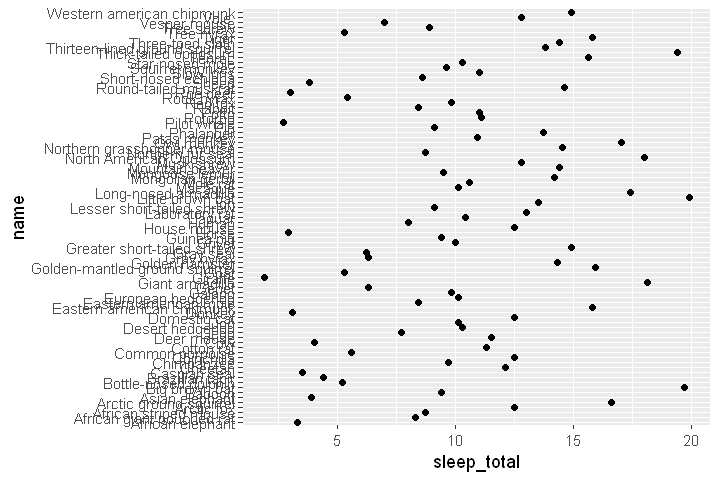

In [60]:
# Basic scatter plot
p <- ggplot(msleep, aes(x = sleep_total, y = name)) +
  geom_point()
  
# Execute to display plot
p


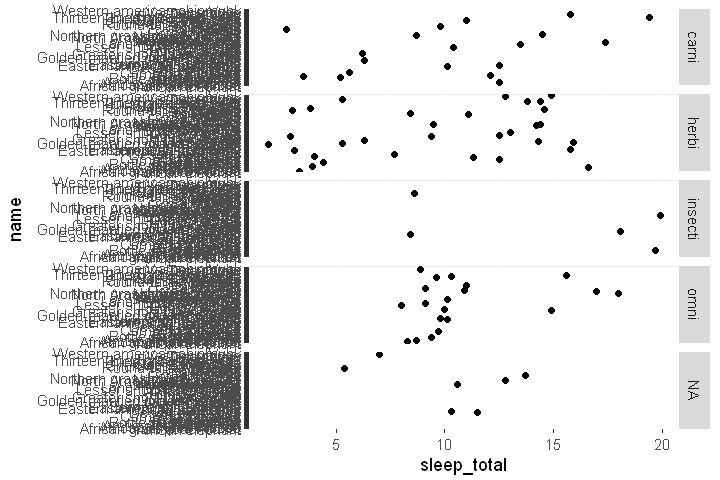

In [61]:
# Facet rows accoding to vore
# If you look at the resulting plot, you'll notice that there are a lot of lines where no data is available.
p +
  facet_grid(vore ~ .)


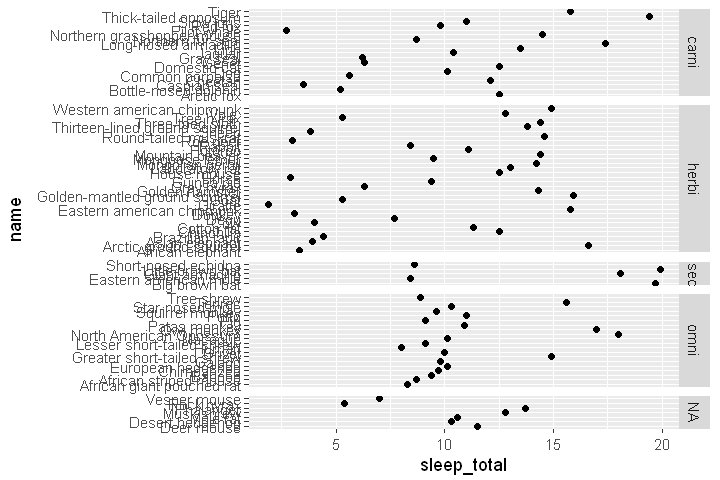

In [62]:
# Specify scale and space arguments to free up rows
# to leave out rows for which there is no data.
p +
  facet_grid( vore ~ ., scale = "free_y", space = "free_y")


# Themes
Note that, the function `theme_set()` changes the theme for the entire session.

![alt text](theme.png "Inheritance")


## Customize the appearance of the plot background

The function `theme()` is used to control non-data parts of the graph including :

    Line elements : axis lines, minor and major grid lines, plot panel border, axis ticks background color, etc.
    Text elements : plot title, axis titles, legend title and text, axis tick mark labels, etc.
    Rectangle elements : plot background, panel background, legend background, etc.

There is a specific function to modify each of these three elements :

    element_line() to modify the line elements of the theme
    element_text() to modify the text elements
    element_rect() to change the appearance of the rectangle elements

Note that, each of the theme elements can be removed using the function `element_blank()`

### element_rect()

The functions `theme()` and `element_rect()` are used for changing the plot panel background color :

`p + theme(panel.background = element_rect(fill, colour, size, linetype, color))`


* fill : the fill color for the rectangle
* colour, color : border color
* size : border size



In [70]:
myCol <- brewer.pal(9, "Blues")[c(3,6,8)]
z <- ggplot(mtcars, (aes(x = wt, y = mpg, col = cyl)))+
        geom_point()+
        scale_color_manual(values = myCol)+
        facet_grid(. ~ cyl)+
        geom_smooth(method = "lm", se = FALSE)
    

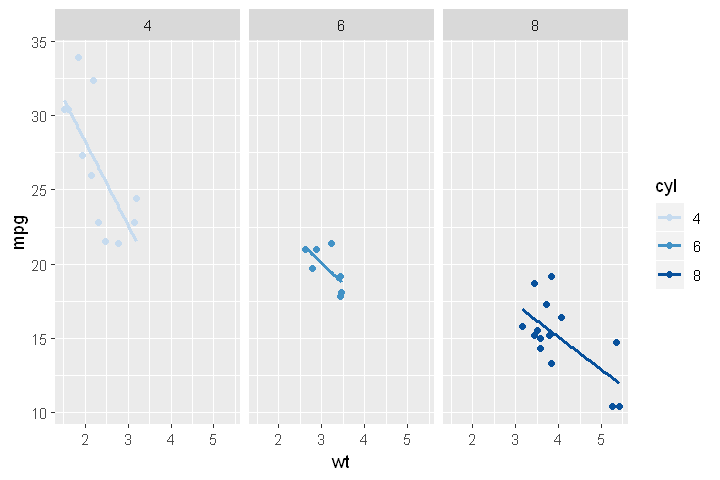

In [71]:
z

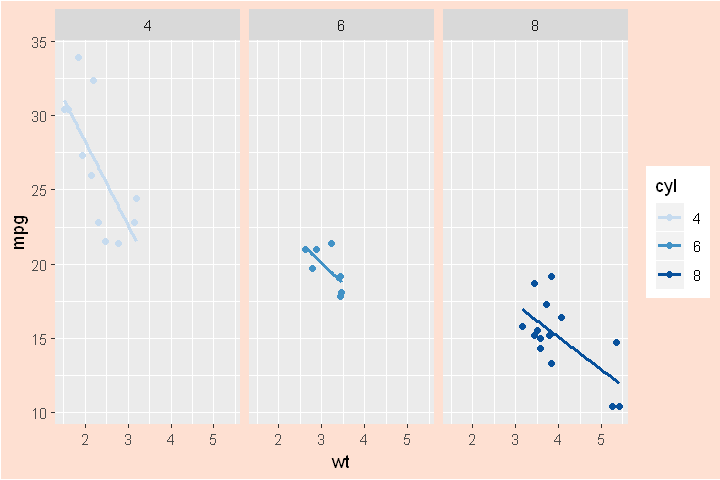

In [73]:
myPink <- "#FEE0D2"

# Plot 1: Change the plot background fill to myPink
z +
  theme(plot.background = element_rect(fill = myPink))

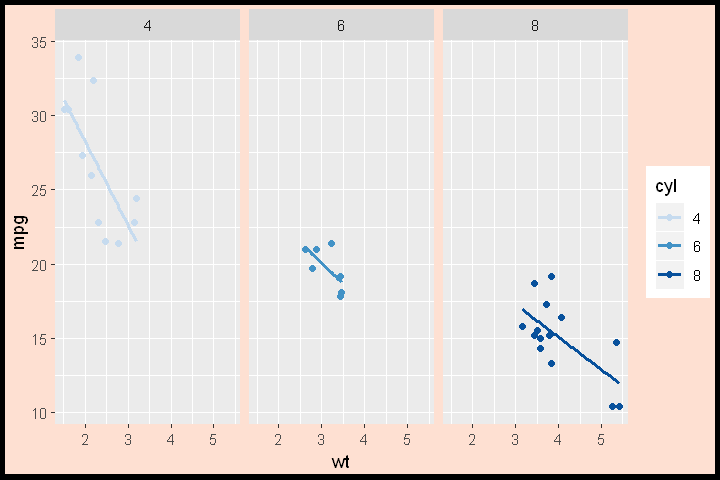

In [74]:
# Plot 2: Adjust the border to be a black line of size 3
z +
  theme(plot.background = element_rect(fill = myPink, color = "black", size = 3))
   # expanded from plot 1

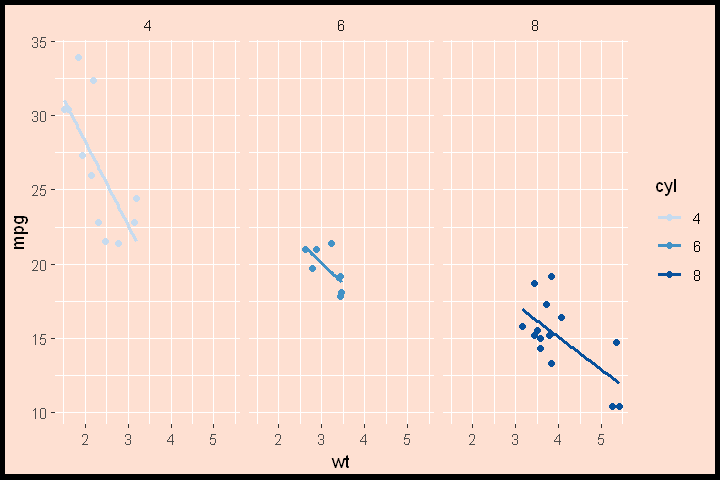

In [75]:
# Theme to remove all rectangles
no_panels <- theme(rect = element_blank())

# Plot 3: Combine custom theme with no panels
z +
  no_panels +
  theme(plot.background = element_rect(fill = myPink, color = "black", size = 3))

### element_lines()

The appearance of grid lines can be changed using the function element_line() as follow :


`p + theme(
  panel.grid.major = element_line(colour, size, linetype, lineend, color),
  panel.grid.minor = element_line(colour, size, linetype, lineend, color)
  )`


* colour, color : line color
* size : line size
* linetype : line type. Line type can be specified using either text (“blank”, “solid”, “dashed”, “dotted”, “dotdash”, “longdash”, “twodash”) or number (0, 1, 2, 3, 4, 5, 6). Note that linetype = “solid” is identical to linetype=1. The available line types in R are described here : Line types in R software
* lineend : line end. Possible values for line end are : “round”, “butt” or “square”



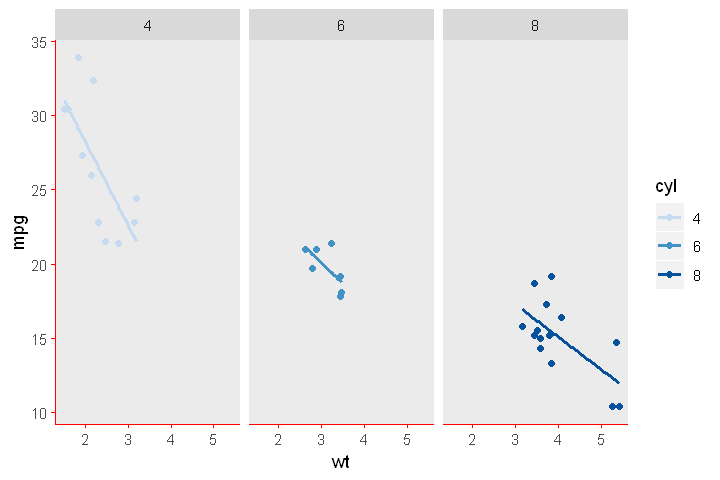

In [79]:
# Extend z with theme() function and make the red color
z + 
  theme(panel.grid = element_blank(),
        axis.line = element_line(color = "red"),
        axis.ticks = element_line(color = "red"))

### element_text()

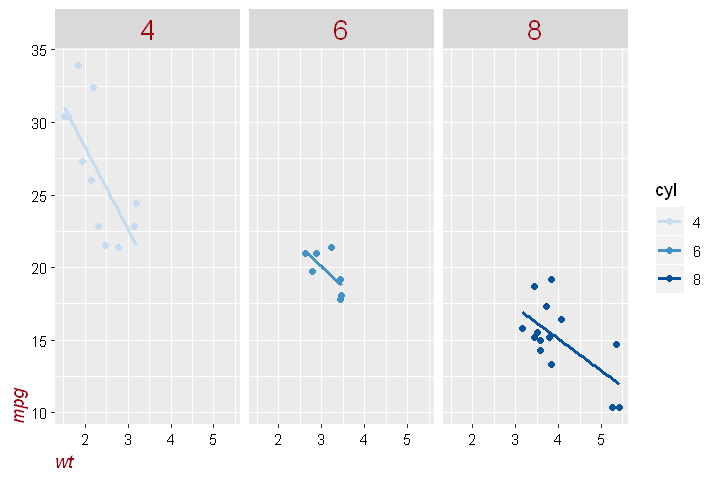

In [86]:
myRed <- "#99000D"

# Extend z with theme() function and 3 args
z +
  theme(strip.text = element_text(size = 16, color = myRed),
        axis.title = element_text(color = myRed, hjust = 0, face = "italic"),
        axis.text = element_text(color = "black"))

### Legends

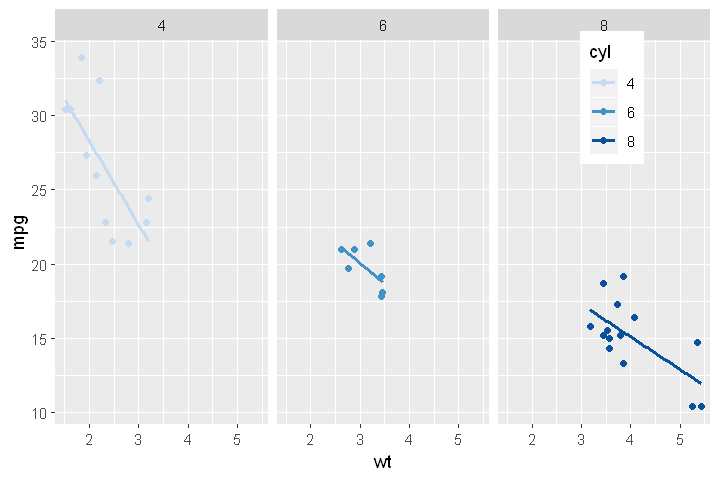

In [87]:
# Move legend by position 
# This will make the legend appear in the top right of the plot, inside the third facet.
z +
  theme(legend.position = c(0.85, 0.85))

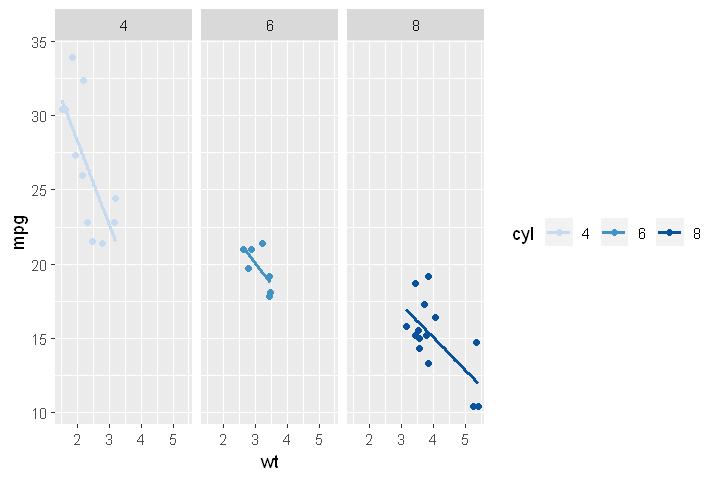

In [88]:
# Change direction
# Instead of a vertical list of legend entries, you might want to have the different entries next to each other. 
z +
  theme(legend.direction = "horizontal")

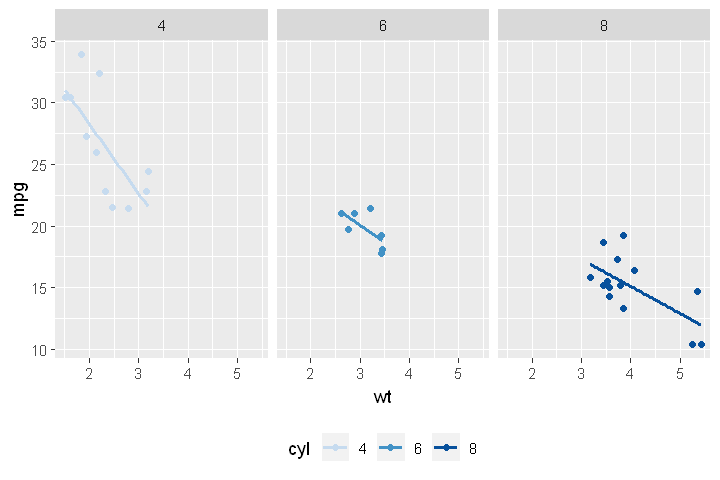

In [89]:
# Change location by name
# You can also change the locations of legends by name
z +
  theme(legend.position = "bottom")

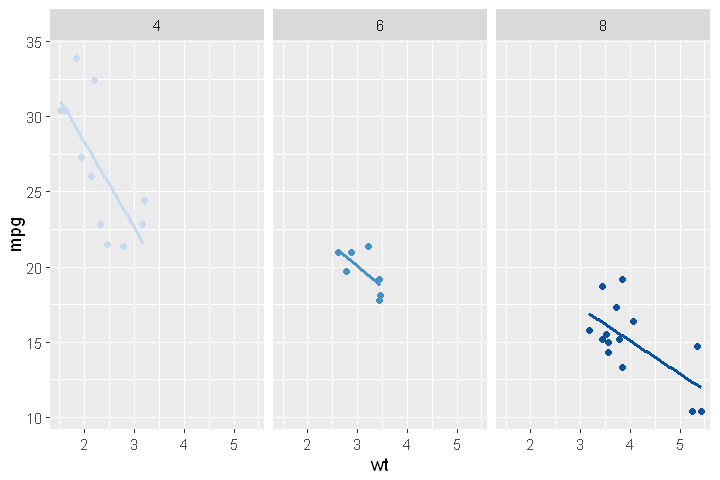

In [90]:
# Remove legend entirely
z +
  theme(legend.position = "none")

### Positions
The different rectangles of your plot have spacing between them. There's spacing between the facets, between the axis labels and the plot rectangle, between the plot rectangle and the entire panel background, etc.

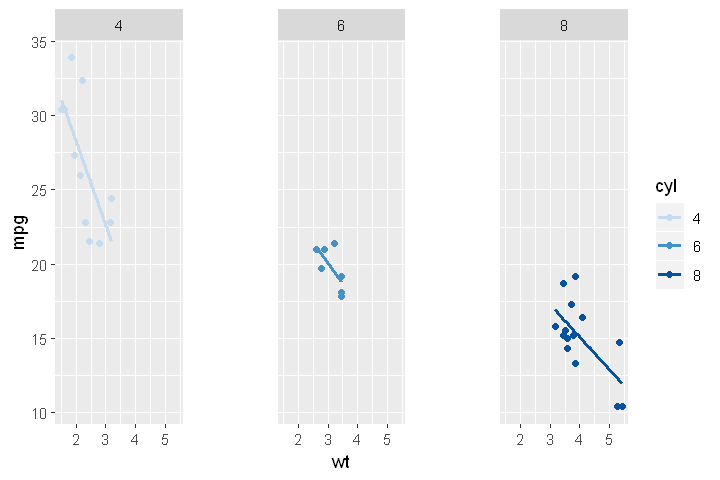

In [91]:
library(grid)
# Increase spacing between facets
z +
  theme(panel.spacing.x = unit(2, "cm"))

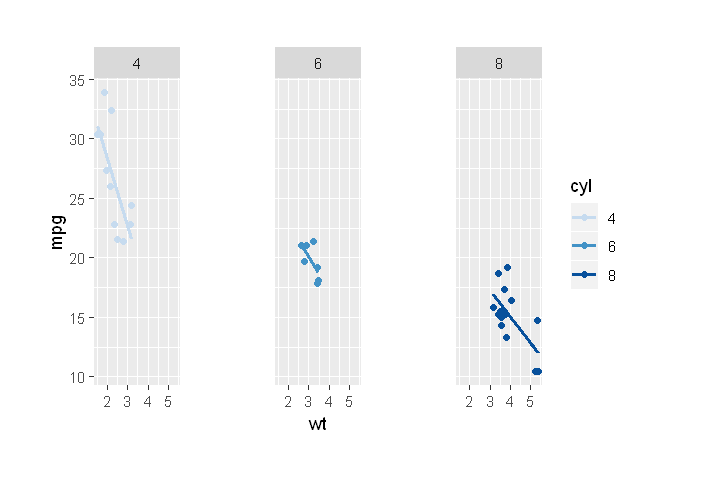

In [92]:
# Adjust the plot margin
# (spacing for top, right, bottom, and left margins)
z +
  theme(panel.spacing.x = unit(2, "cm"),
    plot.margin = unit(c(1, 2, 1, 1), "cm"))

### Theme recycling

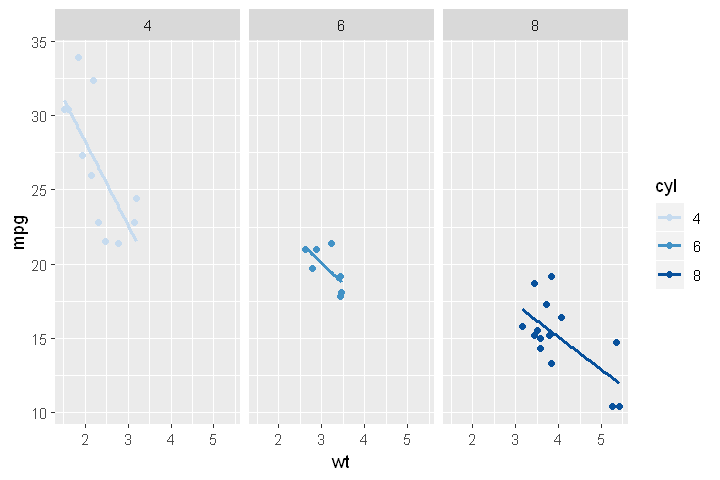

In [93]:
# Original plot
z

In [94]:
# Theme layer saved as an object, theme_pink
theme_pink <- theme(panel.background = element_blank(),
                    legend.key = element_blank(),
                    legend.background = element_blank(),
                    strip.background = element_blank(),
                    plot.background = element_rect(fill = myPink, color = "black", size = 3),
                    panel.grid = element_blank(),
                    axis.line = element_line(color = "red"),
                    axis.ticks = element_line(color = "red"),
                    strip.text = element_text(size = 16, color = myRed),
                    axis.title.y = element_text(color = myRed, hjust = 0, face = "italic"),
                    axis.title.x = element_text(color = myRed, hjust = 0, face = "italic"),
                    axis.text = element_text(color = "black"),
                    legend.position = "none")


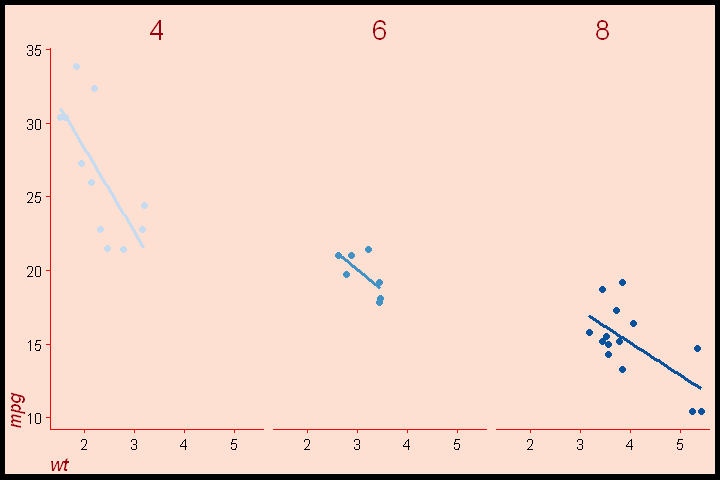

In [96]:
# 1 - Apply theme_pink to z2
z +
  theme_pink

In [97]:
# 2 - Update the default theme, and at the same time
# assign the old theme to the object old.
old <- theme_update(panel.background = element_blank(),
             legend.key = element_blank(),
             legend.background = element_blank(),
             strip.background = element_blank(),
             plot.background = element_rect(fill = myPink, color = "black", size = 3),
             panel.grid = element_blank(),
             axis.line = element_line(color = "red"),
             axis.ticks = element_line(color = "red"),
             strip.text = element_text(size = 16, color = myRed),
             axis.title.y = element_text(color = myRed, hjust = 0, face = "italic"),
             axis.title.x = element_text(color = myRed, hjust = 0, face = "italic"),
             axis.text = element_text(color = "black"),
             legend.position = "none")

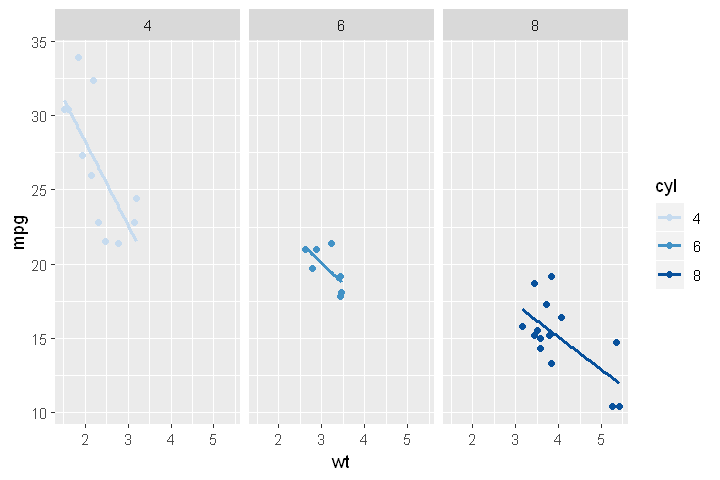

In [101]:
# 4 - Restore the old default theme
theme_set(old)

# Display the plot z2 - old theme restored
z

### Exploring ggthemes

There are many themes available by default in ggplot2: theme_bw(), theme_classic(), theme_grey()(is the default), etc. In the previous exercise, you saw that you can apply these themes to all following plots, with theme_set():

`theme_set(theme_bw())`

But you can also apply them on an individual plot, with:

... + theme_bw()

You can also extend these themes with your own modifications. In this exercise, you'll experiment with this and use some preset templates available from the ggthemes package. The workspace already contains the same basic plot from before under the name z2.

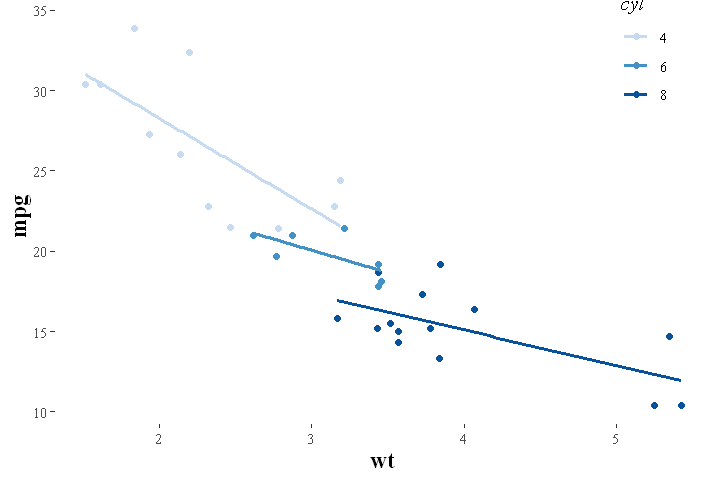

In [104]:
# Original plot
myCol <- brewer.pal(9, "Blues")[c(3,6,8)]
z <- ggplot(mtcars, (aes(x = wt, y = mpg, col = cyl)))+
        geom_point()+
        scale_color_manual(values = myCol)+
        geom_smooth(method = "lm", se = FALSE)

# Load ggthemes
library(ggthemes)

# Apply theme_tufte(), plot additional modifications
custom_theme <- theme_tufte() +
  theme(legend.position = c(0.9, 0.9),
        legend.title = element_text(face = "italic",
        size = 12), axis.title = element_text(face = "bold", size = 14))

# Draw the customized plot
z + custom_theme

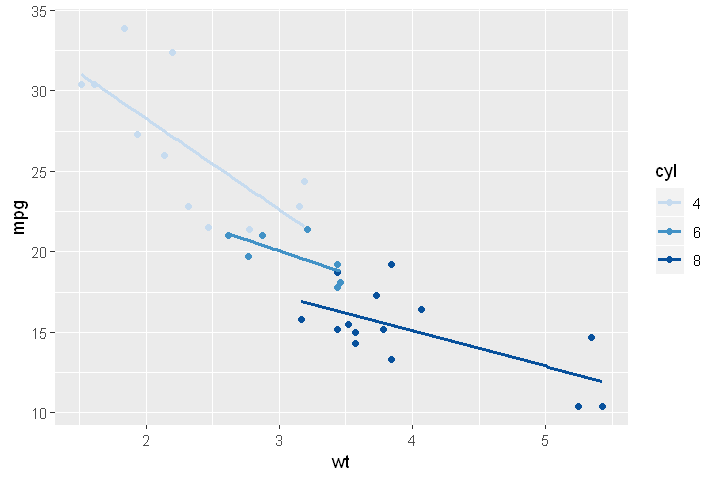

In [111]:
# Use theme set to set custom theme as default
theme_set(theme_grey())

# Plot z2 again
z

# Best practises
## Bar plots

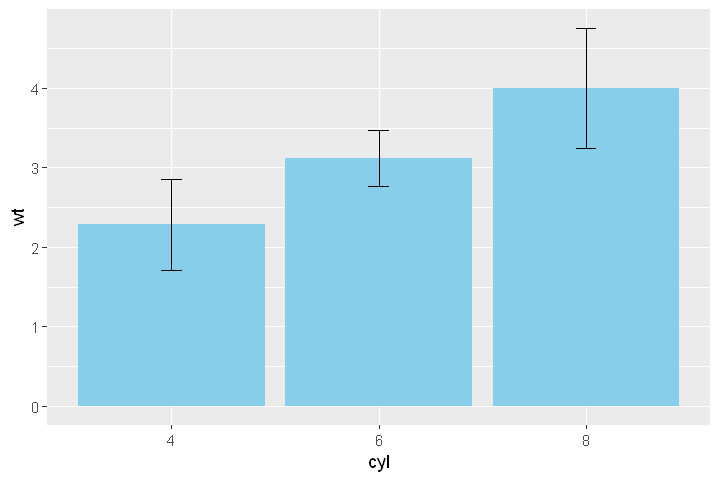

In [113]:
# Base layers
m <- ggplot(mtcars, aes(x = cyl, y = wt))

# Draw dynamite plot
m +
  stat_summary(fun.y = mean, geom = "bar", fill = "skyblue") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)

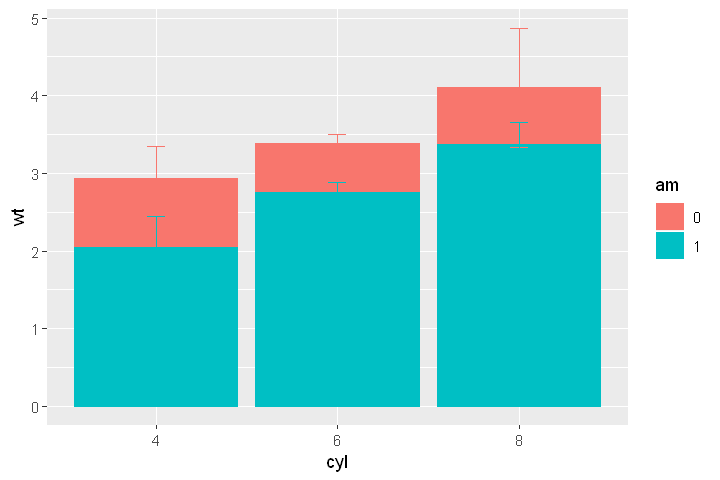

In [114]:
# Base layers
m <- ggplot(mtcars, aes(x = cyl,y = wt, col = am, fill = am))

# Plot 1: Draw dynamite plot
m +
  stat_summary(fun.y = mean, geom = "bar") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)

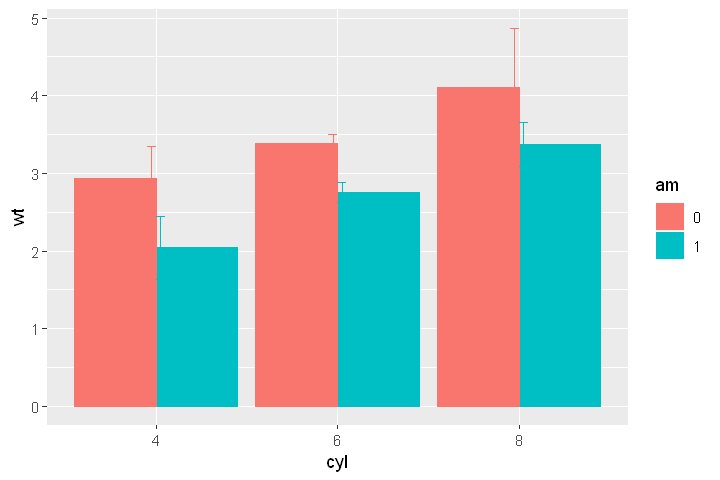

In [115]:
# Plot 2: Set position dodge in each stat function
m +
  stat_summary(fun.y = mean, geom = "bar", position = "dodge") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), 
               geom = "errorbar", width = 0.1, position = "dodge")

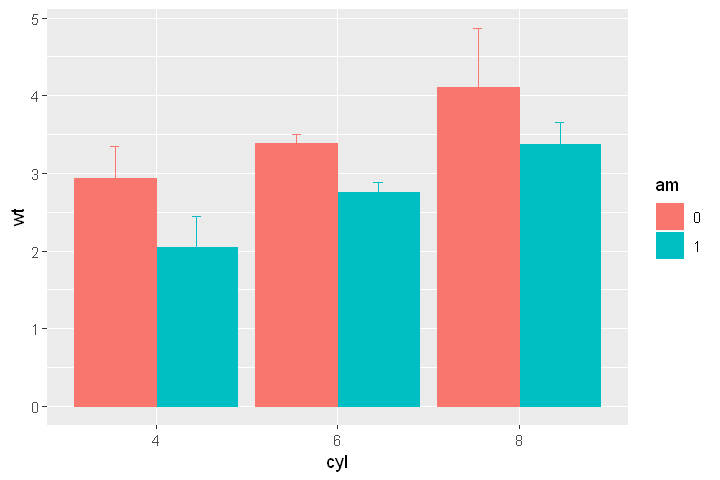

In [116]:
# Set your dodge posn manually
posn.d <- position_dodge(0.9)

# Plot 3: Redraw dynamite plot
m +
  stat_summary(fun.y = mean, geom = "bar", position = posn.d) +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1, position = posn.d)

stat_summary() doesn't keep track of the count. stat_sum() does (that's the whole point), but it's difficult to access. In this case, the most straightforward thing to do is calculate exactly what we want to plot beforehand

In [140]:
library(dplyr)
mtcars.cyl <- mtcars %>%
                group_by(cyl) %>%
                summarise(wt.avg = mean(wt),
                         sd = sd(wt),
                         n = n())%>%
                mutate(prop = n / sum(n))

In [141]:
mtcars.cyl


cyl,wt.avg,sd,n,prop
4,2.285727,0.5695637,11,0.34375
6,3.117143,0.3563455,7,0.21875
8,3.999214,0.7594047,14,0.43750


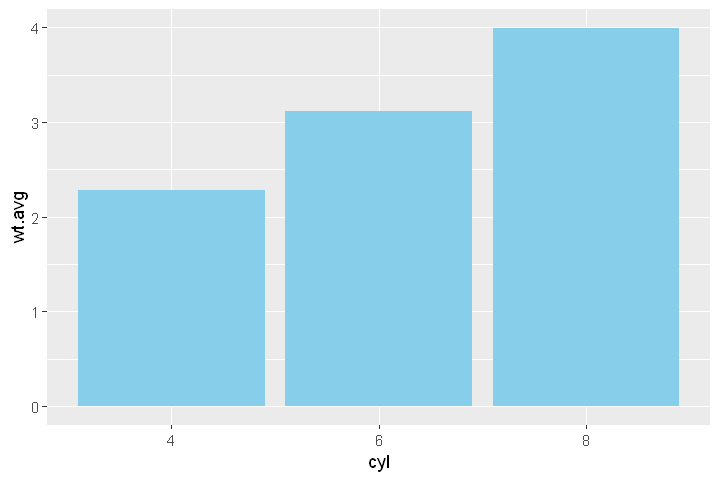

In [142]:
# Base layers
m <- ggplot(mtcars.cyl, aes(x = cyl, y = wt.avg))

# Plot 1: Draw bar plot with geom_bar
m + geom_bar(stat = "identity", fill = "skyblue")

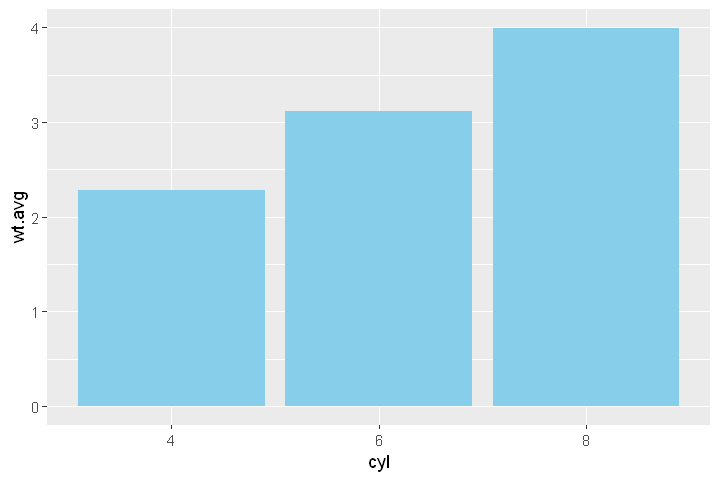

In [143]:
# Plot 2: Draw bar plot with geom_col
# geom_col() is a shortcut for geom_bar(stat = "identity"), for when your data already has counts.
m + geom_col(fill = "skyblue")

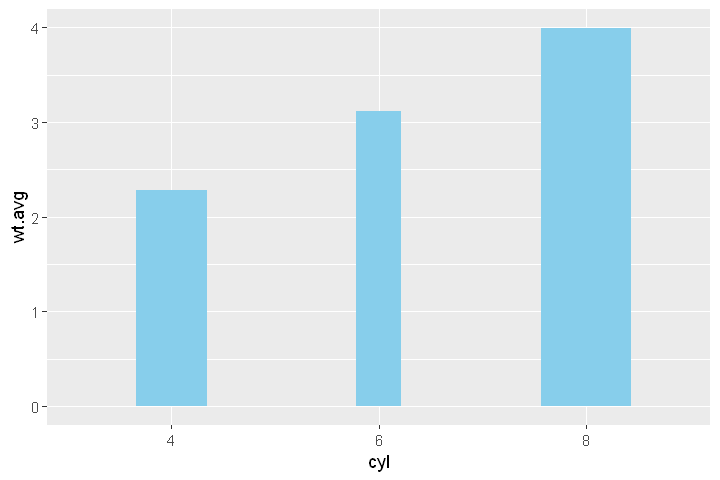

In [144]:
# Plot 3: geom_col with variable widths.
m + geom_col(fill = "skyblue", width = mtcars.cyl$prop)

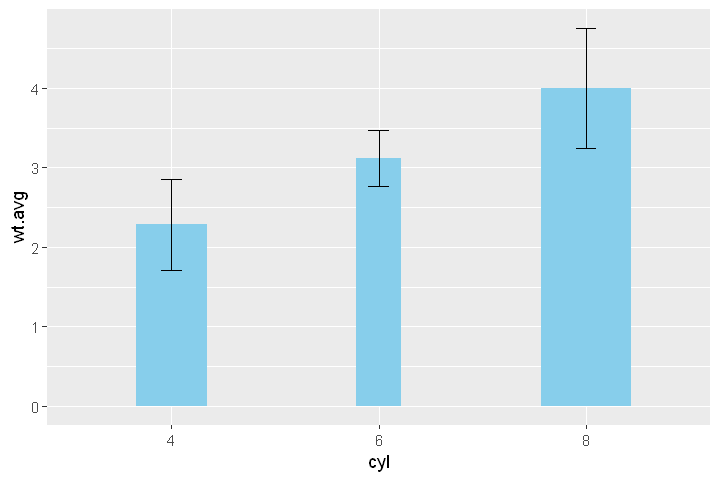

In [145]:
# Plot 4: Add error bars
m + 
  geom_col(fill = "skyblue", width = mtcars.cyl$prop) +
  geom_errorbar(aes(ymin = wt.avg - sd, ymax = wt.avg + sd), width = 0.1)

## Pie chart

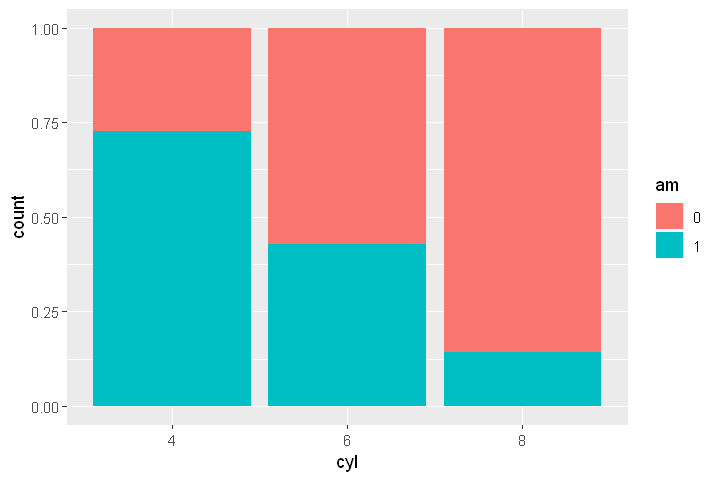

In [146]:
# Bar chart
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "fill")

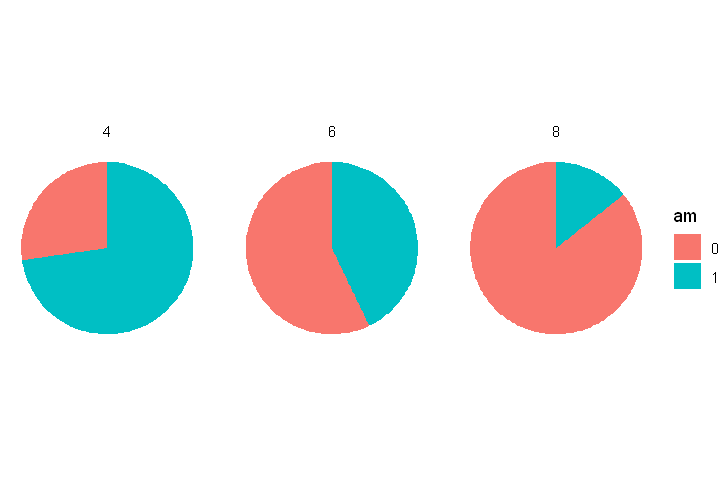

In [147]:
# Convert bar chart to pie chart
ggplot(mtcars, aes(x = factor(1), fill = am)) +
  geom_bar(position = "fill", width = 1) +
  facet_grid(. ~ cyl) + # Facets
  coord_polar(theta = "y") + # Coordinates
  theme_void() # theme

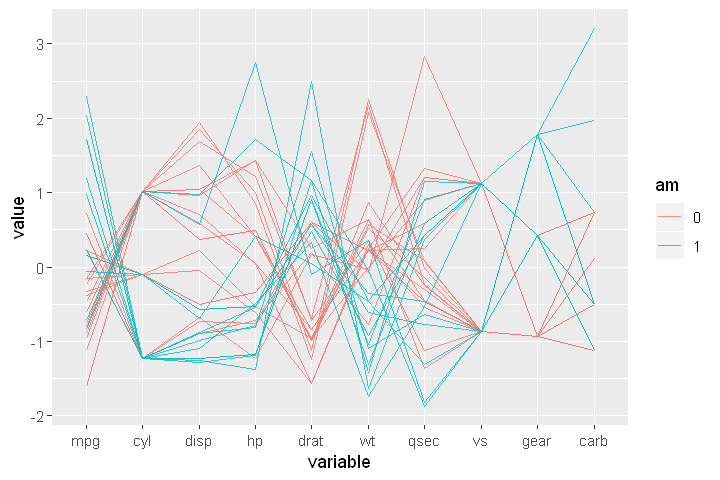

In [150]:
# Parallel coordinates plot using GGally
library(GGally)

# All columns except am
group_by_am <- 9
my_names_am <- (1:11)[-group_by_am]

# Basic parallel plot - each variable plotted as a z-score transformation
ggparcoord(mtcars, my_names_am, groupColumn = group_by_am, alpha = 0.8)

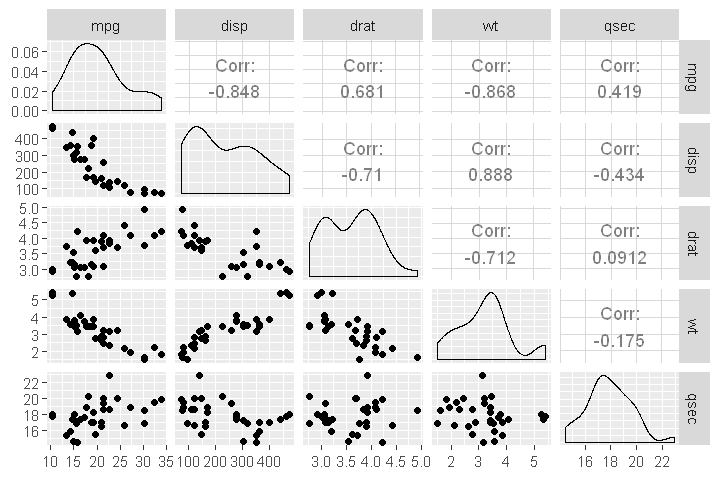

In [156]:
mtcars2 <- select(mtcars, mpg, disp, drat, wt, qsec)
GGally::ggpairs(mtcars2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


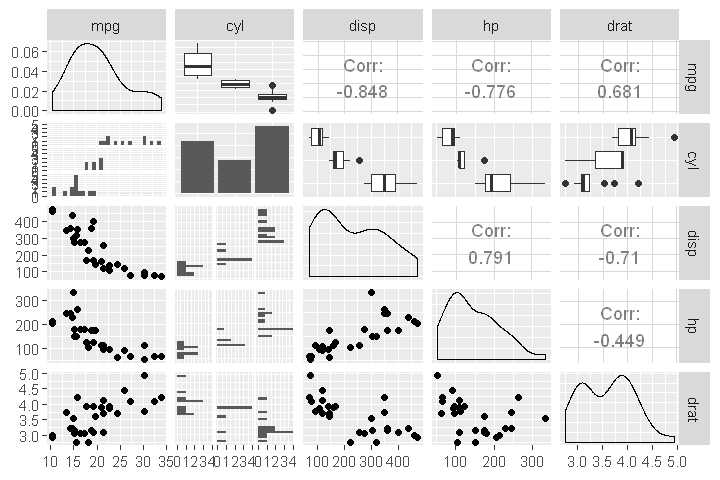

In [157]:
mtcars3 <- select(mtcars, mpg, cyl, disp, hp, drat)
GGally::ggpairs(mtcars3)

## Heat Maps

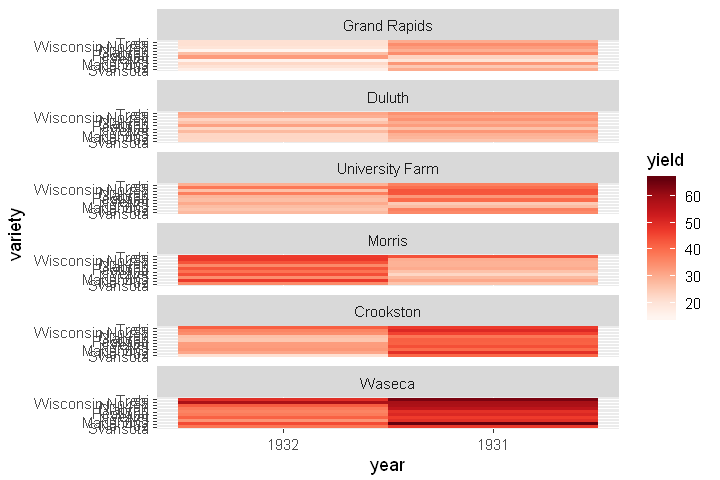

In [160]:
library(lattice)
myColors <- c("#FFF5F0", "#FEE0D2", "#FCBBA1", "#FC9272", "#FB6A4A", "#EF3B2C", "#CB181D", "#A50F15", "#67000D")
# Create color palette
myColors <- brewer.pal(9, "Reds")

# Build the heat map from scratch
ggplot(barley, aes(x = year, y = variety, fill = yield)) +
  geom_tile() + # Geom layer
  facet_wrap( ~ site, ncol = 1) + # Facet layer
  scale_fill_gradientn(colors = myColors) # Adjust colors

## Heat maps alternative

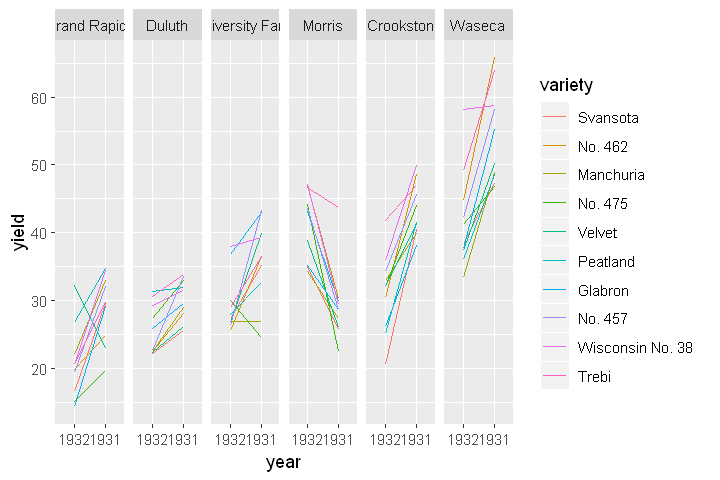

In [162]:
# Line plot; set the aes, geom and facet
ggplot(barley, aes(x = year, y = yield, col = variety, group = variety)) +
  geom_line() +
  facet_wrap( ~ site, nrow = 1)

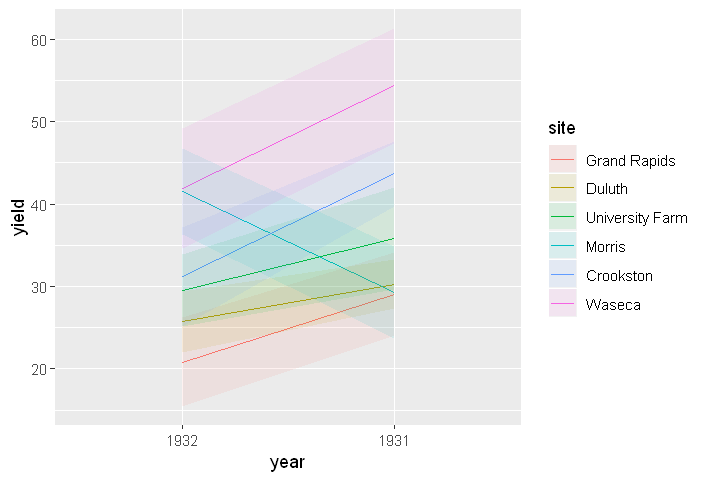

In [163]:
# Create overlapping ribbon plot from scratch
# Line plot; set the aes, geom and facet
ggplot(barley, aes(x = year, y = yield, col = site, group = site, fill = site)) +
  stat_summary(fun.y = mean, geom = "line")+
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "ribbon", col = NA, alpha = 0.1)